<a href="https://colab.research.google.com/github/siim2mary/OIBSIP/blob/main/EMAILSPAMDETECTIONoas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project-4

---



# EMAIL SPAM DETECTION WITH MACHINE LEARNING

---



**INTRODUCTION**

---



The project appears to be focused on email spam detection using machine learning techniques. The provided document is an implementation in a Jupyter Notebook (FILENAME: EMAILSPAMDETECTIONoas.ipynb) with various sections covering the process of creating, training, and evaluating models for spam classification. The document utilizes several machine learning algorithms, such as Naive Bayes, Support Vector Machines (SVM), and Logistic Regression, along with techniques like grid search for hyperparameter tuning. The goal is to achieve accurate classification of emails into spam and non-spam categories based on features extracted from the email content. The document includes code snippets, visualizations, and performance metrics for each implemented model, showcasing a comprehensive approach to email spam detection.



Objective of the Project:
The main objective of the project is to develop an effective email spam detection system using machine learning techniques. The goal is to build models that can accurately classify emails as either spam or non-spam based on certain features extracted from the email content. The project aims to enhance the efficiency of email filtering and reduce the likelihood of users encountering spam in their inboxes.

Key Components:
************************************************************************

Data Preprocessing:
*************************

Cleaning and organizing the email dataset.
Feature extraction from email content, such as text processing and analysis.

Model Development:
*******************************

Implementation of machine learning algorithms like Naive Bayes, Support Vector Machines (SVM), and Logistic Regression.
Hyperparameter tuning using techniques like grid search to optimize model performance.

Model Evaluation:
***************************************

Assessment of model accuracy, precision, recall, F1-score, and other relevant metrics.
Comparison of different models to identify the most effective one.
GridSearchCV for Hyperparameter Tuning:

Fine-tuning model parameters to enhance performance.
Utilizing GridSearchCV to systematically explore a range of hyperparameter values.

Model Deployment:
********************************************

Deploying the trained model into a production environment for real-time spam detection.
Integrating the model with an email system or application.

Continuous Improvement:
**************************************

Regularly updating the model with new data to adapt to evolving spam patterns.
Monitoring model performance and making necessary adjustments.
Expected Outcomes:

Accurate Spam Detection:
********************************************************

The deployed model should effectively identify spam emails, reducing false positives and negatives.
Efficient Email Filtering:
*********************************

Integration of the model into email systems to provide users with a more secure and spam-free experience.
User Satisfaction:
**************************************

Improved user satisfaction by minimizing the intrusion of spam in email inboxes.
Adaptability:

The model should demonstrate adaptability to changing spam patterns, ensuring long-term effectiveness.
Scalability:

The system should be scalable to handle large volumes of emails and diverse spam characteristics.
By achieving these outcomes, the project aims to contribute to the enhancement of email security and user experience through the implementation of advanced machine learning techniques for spam detection.

Import Libraries

---



In [1]:
# Import necessary libraries

# Importing Python Libraries for Data Processing
import os,sys
import numpy as np
import pandas as pd

# Data Visualization Libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px
import plotly.graph_objects as go


# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

# Natural Language Processing (NLP) and Text Analysis Libraries
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.corpus import stopwords
import string

# Downloading NLTK Data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('wordnet')

# Scikit-Learn (sklearn) Libraries for Machine Learning and Evaluations
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

#Models used
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Evaluation Algorithms
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Dealing with imbalanced dataset
from imblearn.over_sampling import SMOTE



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


Mount Drive

---



In [2]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [3]:
path_to_file = "/content/drive/MyDrive/spam (1).csv"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import shutil

# Copy the file to the current working directory in Colab
shutil.copy(path_to_file, './spam(1).csv')

'./spam(1).csv'

Import Dataset

---



In [6]:
df = pd.read_csv("/content/spam(1).csv",encoding = "ISO-8859-1" )

In [7]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.dropna(axis=1, inplace = True)

In [10]:
df.head()

v1                                                 v2
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
df.rename(columns = {'v1':'Label'}, inplace = True)
df.rename(columns = {'v2': 'Text'}, inplace =True)

In [13]:
df.head()

Label                                               Text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [15]:
df.shape

(5572, 2)

In [16]:
df.dtypes

Label    object
Text     object
dtype: object

In [17]:
# Creating a new column 'class'  for DataFrame called 'df'
df['class'] = df['Label'].map({'ham': 0, 'spam': 1})

In [18]:
df.head()

Label                                               Text  class
0   ham  Go until jurong point, crazy.. Available only ...      0
1   ham                      Ok lar... Joking wif u oni...      0
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...      1
3   ham  U dun say so early hor... U c already then say...      0
4   ham  Nah I don't think he goes to usf, he lives aro...      0

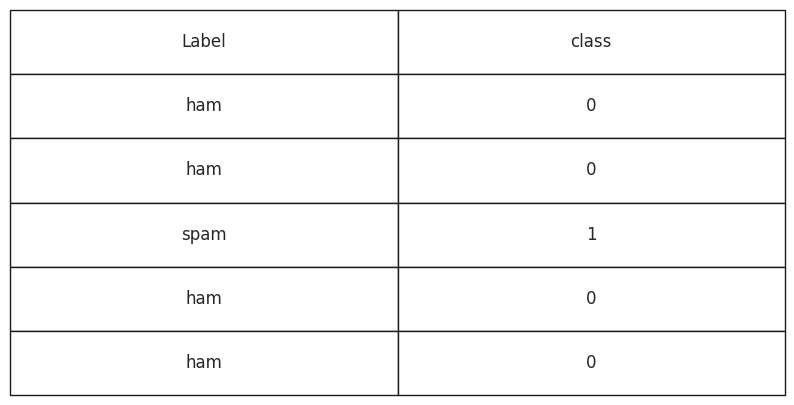

In [19]:

# Assuming df is your DataFrame
df_head = df.head()

# Plotting
fig, ax = plt.subplots(figsize=(10, 5))

# Display 'Label' and 'class' columns in a table
ax.axis('off')
ax.table(cellText=df_head[['Label', 'class']].values,
         colLabels=['Label', 'class'],
         cellLoc='center', loc='center', bbox=[0, 0, 1, 1])

plt.show()


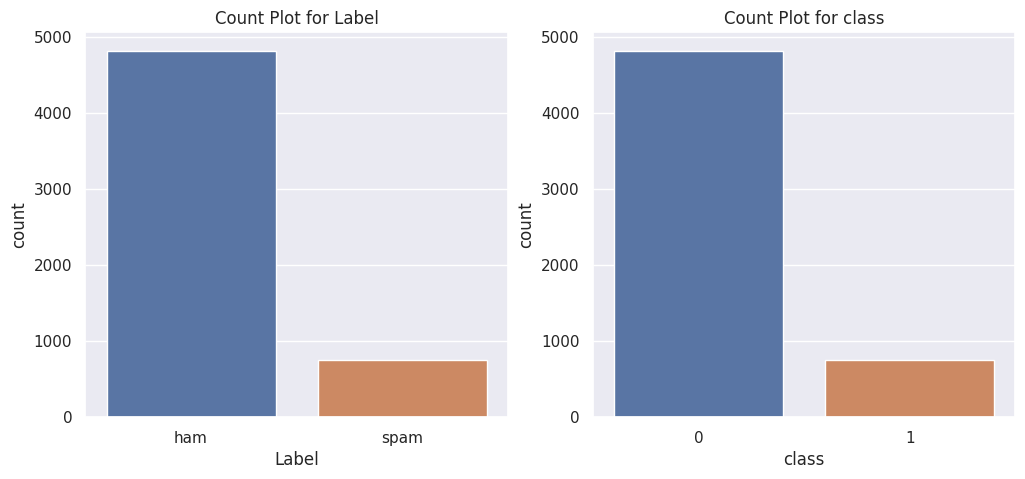

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_head = df.head()

# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count plot for 'Label'
sns.countplot(x='Label', data=df, ax=axes[0])
axes[0].set_title('Count Plot for Label')

# Count plot for 'class'
sns.countplot(x='class', data=df, ax=axes[1])
axes[1].set_title('Count Plot for class')

plt.show()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Label   5572 non-null   object
 1   Text    5572 non-null   object
 2   class   5572 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 130.7+ KB


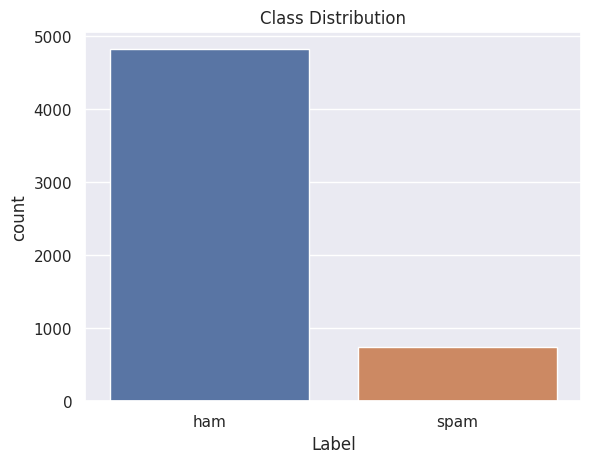

In [22]:
# Check for class distribution
sns.countplot(x='Label', data=df)
plt.title('Class Distribution')
plt.show()

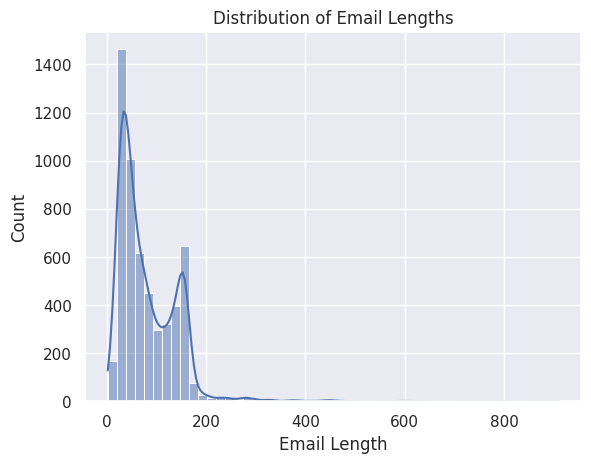

In [23]:
# Visualize the distribution of email lengths
df['email_length'] = df['Text'].apply(len)
sns.histplot(df['email_length'], bins=50, kde=True)
plt.title('Distribution of Email Lengths')
plt.xlabel('Email Length')
plt.show()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         5572 non-null   object
 1   Text          5572 non-null   object
 2   class         5572 non-null   int64 
 3   email_length  5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

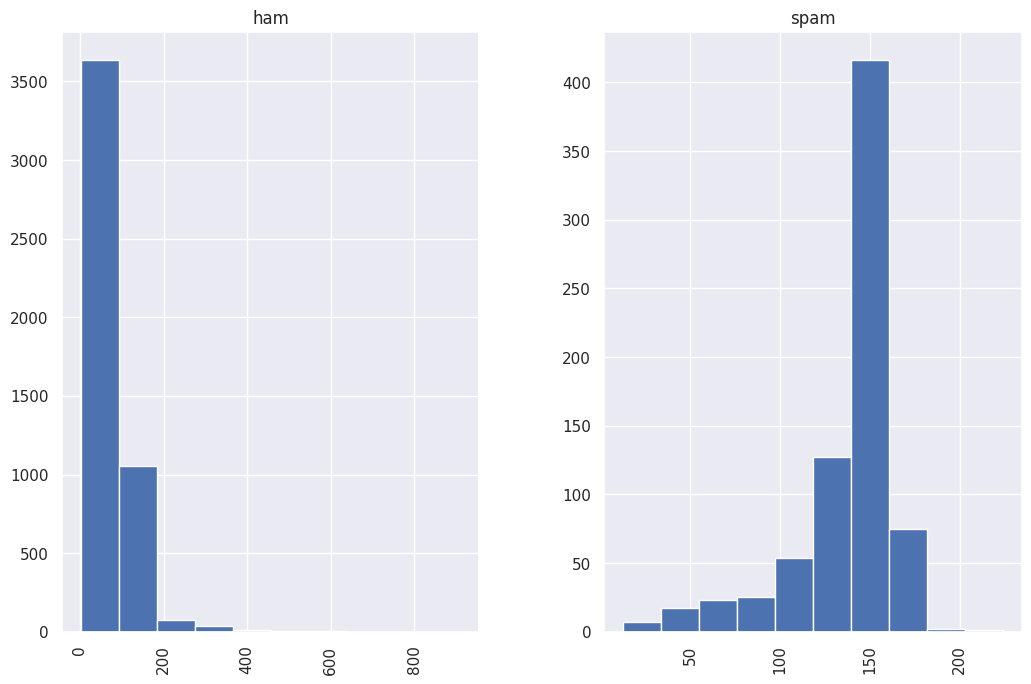

In [25]:
# distribution of spam and ham by length of text
df.hist(column='email_length',by='Label',figsize=(12,8))

In [26]:
# Explore the most common words in spam and non-spam emails
spam_words = ' '.join(df[df['Label'] == 1]['Text'])
ham_words = ' '.join(df[df['Label'] == 0]['Text'])


**Visualisation of SPAM and HAM words from Word Cloud**

---



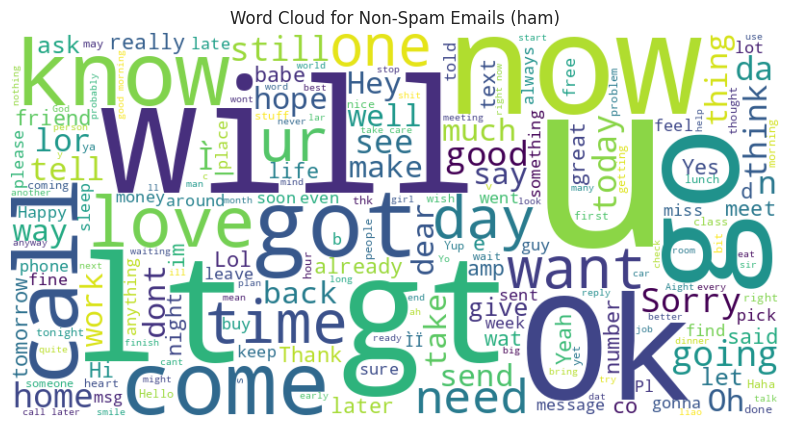

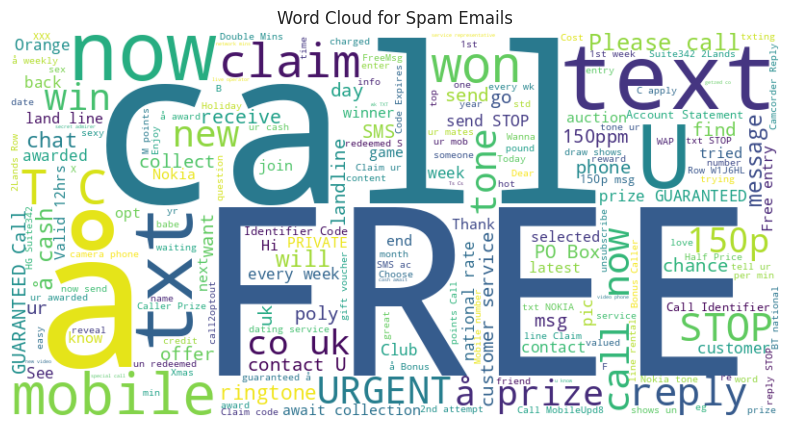

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract text for ham and spam emails
ham_words = ' '.join(df[df['Label'] == 'ham']['Text'])
spam_words = ' '.join(df[df['Label'] == 'spam']['Text'])

# Word cloud for ham emails
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_words)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Non-Spam Emails (ham)')
plt.show()

# Word cloud for spam emails
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_words)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Emails')
plt.show()


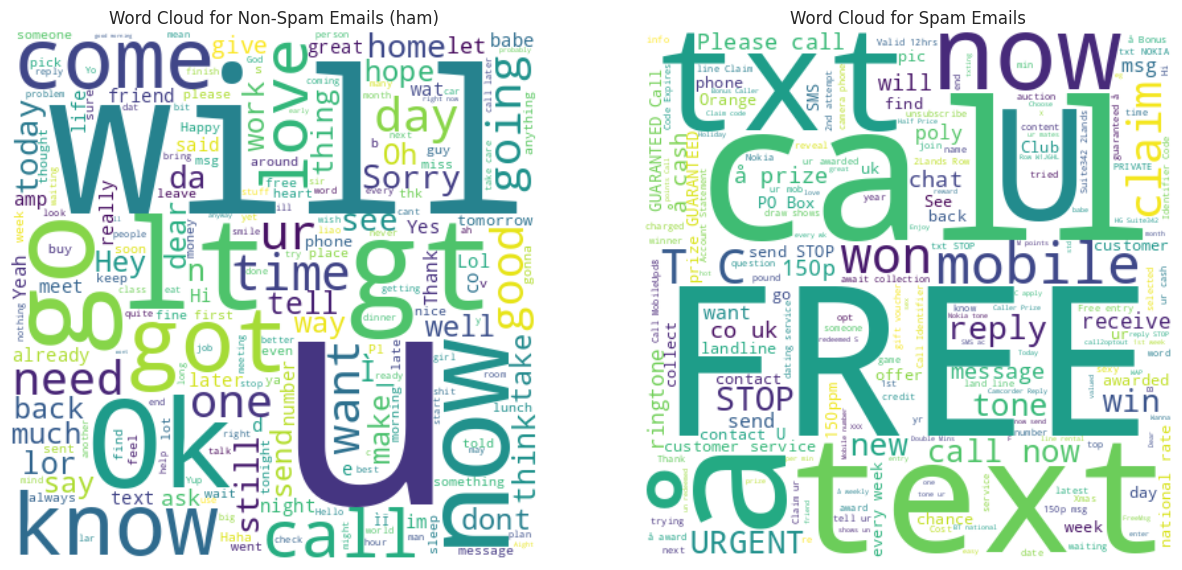

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract text for ham and spam emails
ham_words = ' '.join(df[df['Label'] == 'ham']['Text'])
spam_words = ' '.join(df[df['Label'] == 'spam']['Text'])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Word cloud for ham emails
ham_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(ham_words)
axes[0].imshow(ham_wordcloud, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud for Non-Spam Emails (ham)')

# Word cloud for spam emails
spam_wordcloud = WordCloud(width=400, height=400, background_color='white').generate(spam_words)
axes[1].imshow(spam_wordcloud, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud for Spam Emails')

plt.show()


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Label         5572 non-null   object
 1   Text          5572 non-null   object
 2   class         5572 non-null   int64 
 3   email_length  5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [30]:
df.dtypes

Label           object
Text            object
class            int64
email_length     int64
dtype: object

In [31]:
df.shape

(5572, 4)

To know the Total count

---



In [32]:
df['Label'].value_counts()

ham     4825
spam     747
Name: Label, dtype: int64

In [33]:
df['class'].value_counts()

0    4825
1     747
Name: class, dtype: int64

In [34]:
df['Text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Text, Length: 5572, dtype: object

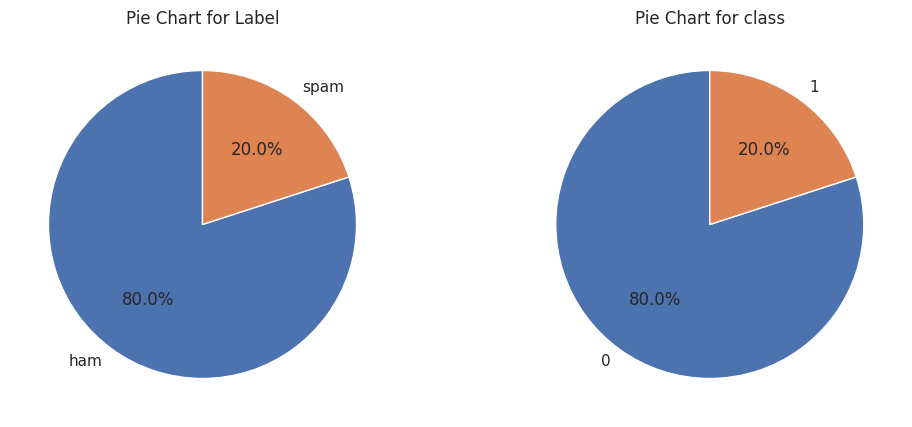

In [35]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
df_head = df.head()

# Set up the figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Pie chart for 'Label'
label_counts = df_head['Label'].value_counts()
axes[0].pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Pie Chart for Label')

# Pie chart for 'class'
class_counts = df_head['class'].value_counts()
axes[1].pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Pie Chart for class')

plt.show()


Percentage of Ham and Spam

---



In [36]:
percentage_class = df['class'].value_counts()/df['class'].size*100
percentage_class

0    86.593683
1    13.406317
Name: class, dtype: float64

In [37]:
df['Label'].value_counts()/df['Label'].size

ham     0.865937
spam    0.134063
Name: Label, dtype: float64

In [38]:
percentage_Label = df['Label'].value_counts()/df['Label'].size*100
percentage_Label

ham     86.593683
spam    13.406317
Name: Label, dtype: float64

Data Preprocessing and Text Cleaning

---



In [39]:

df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df['Text']= df['Text'].str.lower()
df['Tokenized_Text']= df['Text'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
#Filtering stopwords from a DataFrame 'df' with a 'Tokenized_Text' column
df['Text_filtered'] = df['Tokenized_Text'].apply(lambda x: [word for word in x if word.lower() not in stopwords.words('english')])


In [40]:
df['Text_filtered']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, goes, usf, lives, around, t...
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å750, pou...
5568                  [ì_, b, going, esplanade, fr, home]
5569                     [pity, mood, soany, suggestions]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Text_filtered, Length: 5572, dtype: object

In [41]:
set(stopwords.words('english'))

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [42]:
import pandas as pd
from nltk.stem import WordNetLemmatizer

# Assuming you have a DataFrame 'df' with a 'Tokenized_Text' column
lemmatizer = WordNetLemmatizer()

df['Lemmatised'] = df['Text_filtered'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words])


In [43]:
df['Lemmatised']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, go, usf, life, around, though]
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å750, pou...
5568                  [ì_, b, going, esplanade, fr, home]
5569                      [pity, mood, soany, suggestion]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Lemmatised, Length: 5572, dtype: object

Convert df['Lemmatised] dataframe to a list to see all the list of words lemmatised


---



In [44]:
"""
lemmatised_list = df['Lemmatised'].tolist()
"""

"\nlemmatised_list = df['Lemmatised'].tolist()\n"

In [45]:
"""
lemmatised_list
"""

'\nlemmatised_list\n'

In [46]:
"""

# Assuming 'lemmatised_list' is your list of lemmatized words and 'df' is your original DataFrame
df['Lemmatised'] = pd.DataFrame({'Lemmatised': lemmatised_list})
"""

"\n\n# Assuming 'lemmatised_list' is your list of lemmatized words and 'df' is your original DataFrame\ndf['Lemmatised'] = pd.DataFrame({'Lemmatised': lemmatised_list})\n"

In [47]:
df['Lemmatised']

0       [go, jurong, point, crazy, available, bugis, n...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, 2, wkly, comp, win, fa, cup, fin...
3           [u, dun, say, early, hor, u, c, already, say]
4       [nah, dont, think, go, usf, life, around, though]
                              ...                        
5567    [2nd, time, tried, 2, contact, u, u, å750, pou...
5568                  [ì_, b, going, esplanade, fr, home]
5569                      [pity, mood, soany, suggestion]
5570    [guy, bitching, acted, like, id, interested, b...
5571                                   [rofl, true, name]
Name: Lemmatised, Length: 5572, dtype: object

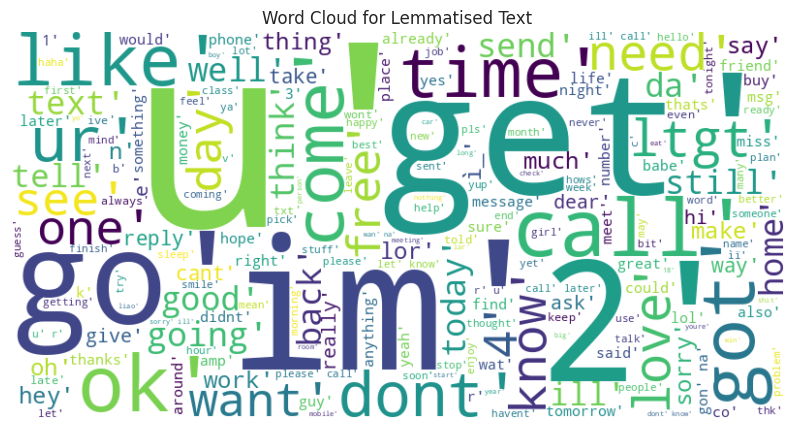

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Convert the 'Lemmatised' column to a single string
text_for_wordcloud = ' '.join(df['Lemmatised'].astype(str))

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_for_wordcloud)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Lemmatised Text')
plt.show()


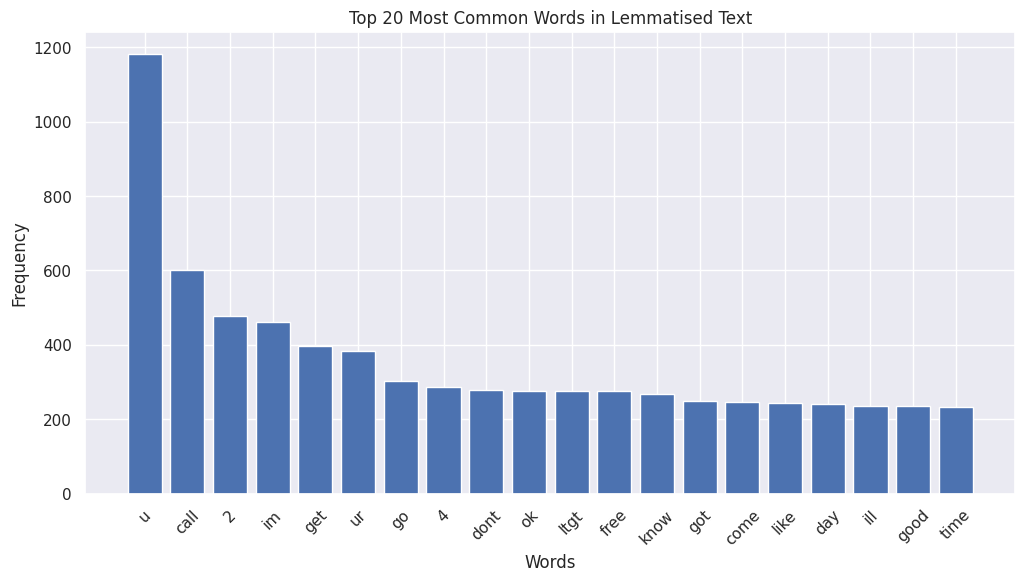

In [49]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the lists in the 'Lemmatised' column and join them into a single string
tokenized_words = ' '.join(df['Lemmatised'].apply(lambda x: ' '.join(x))).split()

# Count the frequency of each word
word_freq = Counter(tokenized_words)

# Plot the top N words
top_n = 20  # Change this to visualize more or fewer words
top_words = word_freq.most_common(top_n)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_words)), [count for word, count in top_words], align='center')
plt.xticks(range(len(top_words)), [word for word, count in top_words], rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Common Words in Lemmatised Text')
plt.show()


Applied Stemming

---



In [50]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

# Stem the words in the 'Text_filtered' column
df['Stemmed_Text'] = df['Text_filtered'].apply(lambda x: [stemmer.stem(word) for word in x])

In [51]:
df['Stemmed_Text']

0       [go, jurong, point, crazi, avail, bugi, n, gre...
1                            [ok, lar, joke, wif, u, oni]
2       [free, entri, 2, wkli, comp, win, fa, cup, fin...
3           [u, dun, say, earli, hor, u, c, alreadi, say]
4       [nah, dont, think, goe, usf, live, around, tho...
                              ...                        
5567    [2nd, time, tri, 2, contact, u, u, å750, pound...
5568                      [ì_, b, go, esplanad, fr, home]
5569                         [piti, mood, soani, suggest]
5570    [guy, bitch, act, like, id, interest, buy, som...
5571                                   [rofl, true, name]
Name: Stemmed_Text, Length: 5572, dtype: object

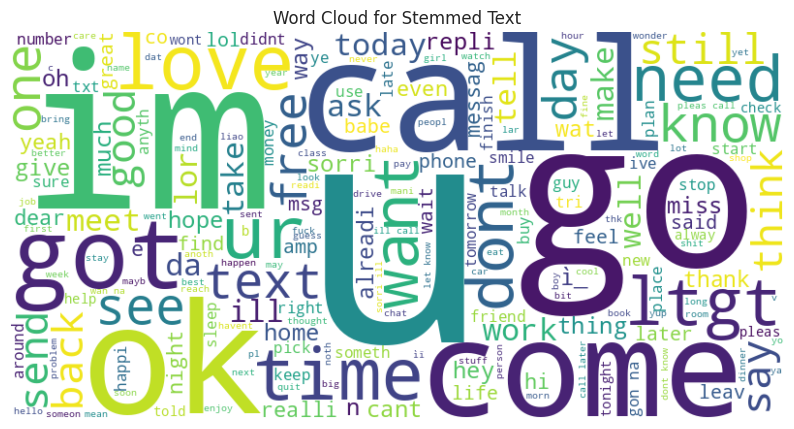

In [52]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Flatten the lists in the 'Stemmed_Text' column and join them into a single string
text_for_wordcloud_stemmed = ' '.join(df['Stemmed_Text'].apply(lambda x: ' '.join(x)))

# Generate the Word Cloud
wordcloud_stemmed = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text_for_wordcloud_stemmed)

# Plot the Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_stemmed, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Stemmed Text')
plt.show()


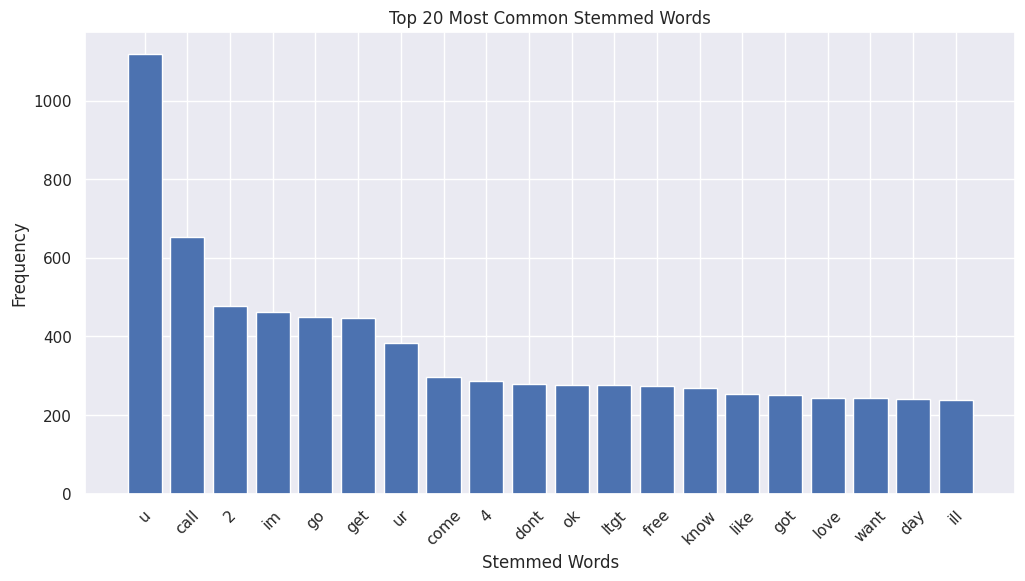

In [53]:
from collections import Counter
import matplotlib.pyplot as plt

# Flatten the lists in the 'Stemmed_Text' column and join them into a single string
tokenized_words_stemmed = ' '.join(df['Stemmed_Text'].apply(lambda x: ' '.join(x))).split()

# Count the frequency of each stemmed word
word_freq_stemmed = Counter(tokenized_words_stemmed)

# Plot the top N stemmed words
top_n_stemmed = 20  # Change this to visualize more or fewer words
top_words_stemmed = word_freq_stemmed.most_common(top_n_stemmed)

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_words_stemmed)), [count for word, count in top_words_stemmed], align='center')
plt.xticks(range(len(top_words_stemmed)), [word for word, count in top_words_stemmed], rotation=45)
plt.xlabel('Stemmed Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n_stemmed} Most Common Stemmed Words')
plt.show()


In [54]:
"""
stemmed_list = df['Stemmed_Text'].tolist()
stemmed_list
"""

"\nstemmed_list = df['Stemmed_Text'].tolist()\nstemmed_list\n"

In [55]:
"""
# Assuming 'stemmed_list' is your list of stemmed words and 'df' is your original DataFrame
df['Stemmed_Text'] = pd.DataFrame({'Stemmed_Text': stemmed_list})
"""

"\n# Assuming 'stemmed_list' is your list of stemmed words and 'df' is your original DataFrame\ndf['Stemmed_Text'] = pd.DataFrame({'Stemmed_Text': stemmed_list})\n"

In [56]:
punctuation = list(string.punctuation)
punctuation

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [57]:
df.head()

Label                                               Text  class  \
0   ham  go until jurong point crazy available only in ...      0   
1   ham                            ok lar joking wif u oni      0   
2  spam  free entry in 2 a wkly comp to win fa cup fina...      1   
3   ham        u dun say so early hor u c already then say      0   
4   ham  nah i dont think he goes to usf he lives aroun...      0   

   email_length                                     Tokenized_Text  \
0           111  [go, until, jurong, point, crazy, available, o...   
1            29                     [ok, lar, joking, wif, u, oni]   
2           155  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3            49  [u, dun, say, so, early, hor, u, c, already, t...   
4            61  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                       Text_filtered  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   

                                          Lemmatised  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, go, usf, life, around, though]   

                                        Stemmed_Text  
0  [go, jurong, point, crazi, avail, bugi, n, gre...  
1                       [ok, lar, joke, wif, u, oni]  
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...  
3      [u, dun, say, earli, hor, u, c, alreadi, say]  
4  [nah, dont, think, goe, usf, live, around, tho...

In [58]:
df.isnull().sum()

Label             0
Text              0
class             0
email_length      0
Tokenized_Text    0
Text_filtered     0
Lemmatised        0
Stemmed_Text      0
dtype: int64

In [59]:
df.isna().sum()

Label             0
Text              0
class             0
email_length      0
Tokenized_Text    0
Text_filtered     0
Lemmatised        0
Stemmed_Text      0
dtype: int64

In [60]:
df.isna().any()

Label             False
Text              False
class             False
email_length      False
Tokenized_Text    False
Text_filtered     False
Lemmatised        False
Stemmed_Text      False
dtype: bool

There are no null values

To check null values

---



<Axes: >

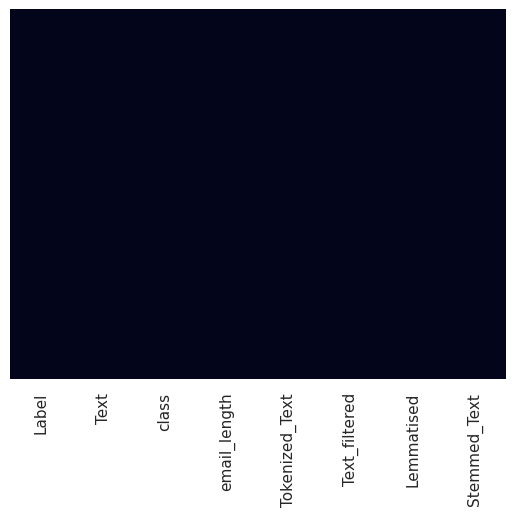

In [61]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Label           5572 non-null   object
 1   Text            5572 non-null   object
 2   class           5572 non-null   int64 
 3   email_length    5572 non-null   int64 
 4   Tokenized_Text  5572 non-null   object
 5   Text_filtered   5572 non-null   object
 6   Lemmatised      5572 non-null   object
 7   Stemmed_Text    5572 non-null   object
dtypes: int64(2), object(6)
memory usage: 348.4+ KB


In [63]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

# Create a SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each word in the 'Lemmatised' column
sentiment_scores = df['Lemmatised'].apply(lambda words: [sia.polarity_scores(word)['compound'] for word in words])

# Calculate the average sentiment for each row
df['Average_Sentiment'] = sentiment_scores.apply(lambda scores: sum(scores) / len(scores) if len(scores) > 0 else 0)


In [64]:
len(sentiment_scores)

5572

In [65]:
# Calculate the average sentiment for each row
df['Average_Sentiment'] = sentiment_scores.apply(lambda scores: sum(scores) / len(scores) if len(scores) > 0 else 0)
df['Average_Sentiment']

0       0.017806
1       0.087050
2       0.047674
3       0.000000
4      -0.012837
          ...   
5567    0.047550
5568    0.000000
5569   -0.074000
5570    0.071464
5571    0.331133
Name: Average_Sentiment, Length: 5572, dtype: float64

In [66]:
positive_words = [word for i, word in enumerate(df['Text_filtered']) if df['Average_Sentiment'][i] > 0.1]
negative_words = [word for i, word in enumerate(df['Text_filtered']) if df['Average_Sentiment'][i] < -0.1]
neutral_words = [word for i, word in enumerate(df['Text_filtered']) if -0.1 <= df['Average_Sentiment'][i] <= 0.1]


In [67]:
print("The postive words are :", positive_words)

The postive words are : [['even', 'brother', 'like', 'speak', 'treat', 'like', 'aids', 'patent'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'å900', 'prize', 'reward', 'claim', 'call', '09061701461', 'claim', 'code', 'kl341', 'valid', '12', 'hours'], ['ive', 'searching', 'right', 'words', 'thank', 'breather', 'promise', 'wont', 'take', 'help', 'granted', 'fulfil', 'promise', 'wonderful', 'blessing', 'times'], ['iûm', 'going', 'try', '2', 'months', 'ha', 'ha', 'joking'], ['lol', 'always', 'convincing'], ['ahhh', 'work', 'vaguely', 'remember', 'feel', 'like', 'lol'], ['pls', 'go', 'ahead', 'watts', 'wanted', 'sure', 'great', 'weekend', 'abiola'], ['forget', 'tell', 'want', 'need', 'crave', 'love', 'sweet', 'arabian', 'steed', 'mmmmmm', 'yummy'], ['great', 'hope', 'like', 'man', 'well', 'endowed', 'ltgt', 'inches'], ['ha', 'ha', 'ha', 'good', 'joke', 'girls', 'situation', 'seekers'], ['valued', 'customer', 'pleased', 'advise', 'following', 'recent', 'review', 'mob

In [68]:
print("The negative words are :", negative_words)

The negative words are : [['u', 'dont', 'know', 'stubborn', 'didnt', 'even', 'want', 'go', 'hospital', 'kept', 'telling', 'mark', 'im', 'weak', 'sucker', 'hospitals', 'weak', 'suckers'], ['sorry', 'ill', 'call', 'later'], ['bloody', 'hell', 'cant', 'believe', 'forgot', 'surname', 'mr', 'ill', 'give', 'u', 'clue', 'spanish', 'begins'], ['sorry', 'ill', 'call', 'later'], ['hey', 'company', 'elama', 'po', 'mudyadhu'], ['evo', 'download', 'flash', 'jealous'], ['tell', 'rob', 'mack', 'gf', 'theater'], ['hurt', 'tease', 'make', 'cry', 'end', 'life', 'die', 'plz', 'keep', 'one', 'rose', 'grave', 'say', 'stupid', 'miss', 'u', 'nice', 'day', 'bslvyl'], ['problem'], ['sorry', 'ill', 'call', 'later'], ['one', 'small', 'prestige', 'problem'], ['pain', 'urination', 'thing', 'else'], ['sorry', 'ill', 'call', 'later'], ['tension', 'ahwhat', 'machiany', 'problem'], ['thats', 'rude', 'campus'], ['ill', 'late'], ['im', 'tired', 'arguing', 'week', 'week', 'want', 'ill'], ['sorry', 'ill', 'call', 'later']

In [69]:
print("The neutral words are :", neutral_words)

The neutral words are : [['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni'], ['free', 'entry', '2', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', '21st', 'may', '2005', 'text', 'fa', '87121', 'receive', 'entry', 'questionstd', 'txt', 'ratetcs', 'apply', '08452810075over18s'], ['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say'], ['nah', 'dont', 'think', 'goes', 'usf', 'lives', 'around', 'though'], ['freemsg', 'hey', 'darling', '3', 'weeks', 'word', 'back', 'id', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'å150', 'rcv'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'callers', 'press', '9', 'copy', 'friends', 'callertune'], ['mobile', '11', 'months', 'u', 'r', 'entitled', 'update', 'latest', 'colour', 'mobiles', 'camera', 'free', 'call', 'mobile', 'update', 'co', 'f

In [70]:
# Flatten the lists
flat_positive_words = [word for sublist in positive_words for word in sublist]
flat_negative_words = [word for sublist in negative_words for word in sublist]
flat_neutral_words = [word for sublist in neutral_words for word in sublist]

# Calculate frequency distributions
word_freq_positive = nltk.FreqDist(flat_positive_words)
word_freq_negative = nltk.FreqDist(flat_negative_words)
word_freq_neutral = nltk.FreqDist(flat_neutral_words)

# Print the frequency distributions
print("Positive Word Frequencies:")
print(word_freq_positive)

print("\nNegative Word Frequencies:")
print(word_freq_negative)

print("\nNeutral Word Frequencies:")
print(word_freq_neutral)

Positive Word Frequencies:
<FreqDist with 1688 samples and 5398 outcomes>

Negative Word Frequencies:
<FreqDist with 397 samples and 733 outcomes>

Neutral Word Frequencies:
<FreqDist with 8845 samples and 46309 outcomes>


In [71]:
df.head()

Label                                               Text  class  \
0   ham  go until jurong point crazy available only in ...      0   
1   ham                            ok lar joking wif u oni      0   
2  spam  free entry in 2 a wkly comp to win fa cup fina...      1   
3   ham        u dun say so early hor u c already then say      0   
4   ham  nah i dont think he goes to usf he lives aroun...      0   

   email_length                                     Tokenized_Text  \
0           111  [go, until, jurong, point, crazy, available, o...   
1            29                     [ok, lar, joking, wif, u, oni]   
2           155  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3            49  [u, dun, say, so, early, hor, u, c, already, t...   
4            61  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                       Text_filtered  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   

                                          Lemmatised  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, go, usf, life, around, though]   

                                        Stemmed_Text  Average_Sentiment  
0  [go, jurong, point, crazi, avail, bugi, n, gre...           0.017806  
1                       [ok, lar, joke, wif, u, oni]           0.087050  
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...           0.047674  
3      [u, dun, say, earli, hor, u, c, alreadi, say]           0.000000  
4  [nah, dont, think, goe, usf, live, around, tho...          -0.012837

In [72]:
df.columns

Index(['Label', 'Text', 'class', 'email_length', 'Tokenized_Text',
       'Text_filtered', 'Lemmatised', 'Stemmed_Text', 'Average_Sentiment'],
      dtype='object')

In [73]:
# Convert lists to strings and calculate positive sentiment scores
df['Positive_Scores'] = df['Text_filtered'].apply(lambda word_list: sia.polarity_scores(' '.join(word_list))['pos'])
df['Negative_Scores'] = df['Text_filtered'].apply(lambda word_list: sia.polarity_scores(' '.join(word_list))['neg'])

# Print the DataFrame with positive scores
print(df[['Text_filtered', 'Positive_Scores']])
print(df[['Text_filtered', 'Negative_Scores']])

                                          Text_filtered  Positive_Scores
0     [go, jurong, point, crazy, available, bugis, n...            0.222
1                        [ok, lar, joking, wif, u, oni]            0.577
2     [free, entry, 2, wkly, comp, win, fa, cup, fin...            0.262
3         [u, dun, say, early, hor, u, c, already, say]            0.000
4     [nah, dont, think, goes, usf, lives, around, t...            0.000
...                                                 ...              ...
5567  [2nd, time, tried, 2, contact, u, u, å750, pou...            0.307
5568                [ì_, b, going, esplanade, fr, home]            0.000
5569                   [pity, mood, soany, suggestions]            0.000
5570  [guy, bitching, acted, like, id, interested, b...            0.413
5571                                 [rofl, true, name]            0.867

[5572 rows x 2 columns]
                                          Text_filtered  Negative_Scores
0     [go, jurong, point, 

In [74]:
df.head(2)

Label                                               Text  class  \
0   ham  go until jurong point crazy available only in ...      0   
1   ham                            ok lar joking wif u oni      0   

   email_length                                     Tokenized_Text  \
0           111  [go, until, jurong, point, crazy, available, o...   
1            29                     [ok, lar, joking, wif, u, oni]   

                                       Text_filtered  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   

                                          Lemmatised  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   

                                        Stemmed_Text  Average_Sentiment  \
0  [go, jurong, point, crazi, avail, bugi, n, gre...           0.017806   
1                       [ok, lar, joke, wif, u, oni]           0.087050   

   Positive_Scores  Negative_Scores  
0            0.222             0.13  
1            0.577             0.00

In [75]:
# Calculate overall polarity scores
df['Polarity_scores'] = df['Positive_Scores'] - df['Negative_Scores']

# Print the DataFrame with overall polarity scores
print(df[['Text_filtered', 'Polarity_scores']])


                                          Text_filtered  Polarity_scores
0     [go, jurong, point, crazy, available, bugis, n...            0.092
1                        [ok, lar, joking, wif, u, oni]            0.577
2     [free, entry, 2, wkly, comp, win, fa, cup, fin...            0.262
3         [u, dun, say, early, hor, u, c, already, say]            0.000
4     [nah, dont, think, goes, usf, lives, around, t...           -0.167
...                                                 ...              ...
5567  [2nd, time, tried, 2, contact, u, u, å750, pou...            0.307
5568                [ì_, b, going, esplanade, fr, home]            0.000
5569                   [pity, mood, soany, suggestions]           -0.423
5570  [guy, bitching, acted, like, id, interested, b...            0.311
5571                                 [rofl, true, name]            0.867

[5572 rows x 2 columns]


In [76]:
df.head()

Label                                               Text  class  \
0   ham  go until jurong point crazy available only in ...      0   
1   ham                            ok lar joking wif u oni      0   
2  spam  free entry in 2 a wkly comp to win fa cup fina...      1   
3   ham        u dun say so early hor u c already then say      0   
4   ham  nah i dont think he goes to usf he lives aroun...      0   

   email_length                                     Tokenized_Text  \
0           111  [go, until, jurong, point, crazy, available, o...   
1            29                     [ok, lar, joking, wif, u, oni]   
2           155  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3            49  [u, dun, say, so, early, hor, u, c, already, t...   
4            61  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                       Text_filtered  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   

                                          Lemmatised  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, go, usf, life, around, though]   

                                        Stemmed_Text  Average_Sentiment  \
0  [go, jurong, point, crazi, avail, bugi, n, gre...           0.017806   
1                       [ok, lar, joke, wif, u, oni]           0.087050   
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...           0.047674   
3      [u, dun, say, earli, hor, u, c, alreadi, say]           0.000000   
4  [nah, dont, think, goe, usf, live, around, tho...          -0.012837   

   Positive_Scores  Negative_Scores  Polarity_scores  
0            0.222            0.130            0.092  
1            0.577            0.000            0.577  
2            0.262            0.000            0.262  
3            0.000            0.000            0.000  
4            0.000            0.167           -0.167

In [77]:
df.columns

Index(['Label', 'Text', 'class', 'email_length', 'Tokenized_Text',
       'Text_filtered', 'Lemmatised', 'Stemmed_Text', 'Average_Sentiment',
       'Positive_Scores', 'Negative_Scores', 'Polarity_scores'],
      dtype='object')

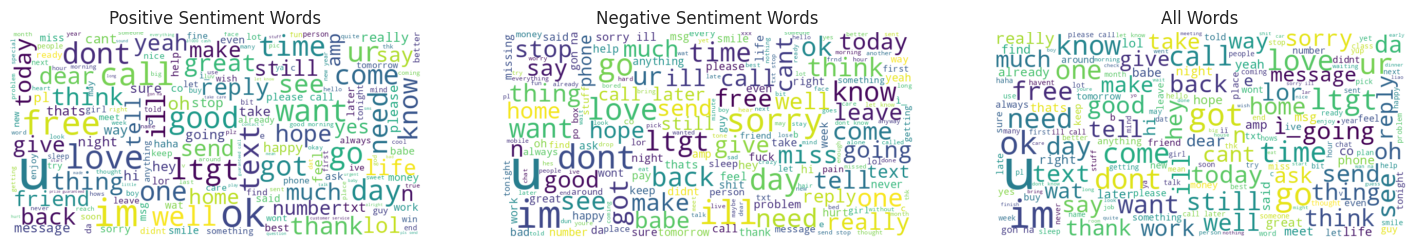

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with columns 'Positive_Scores', 'Negative_Scores', and 'Text_filtered'
# Convert lists to strings
df['Text_combined'] = df['Text_filtered'].apply(lambda word_list: ' '.join(word_list))

# Generate word clouds
positive_words = ' '.join(df[df['Positive_Scores'] > 0]['Text_combined'])
negative_words = ' '.join(df[df['Negative_Scores'] > 0]['Text_combined'])
all_words = ' '.join(df['Text_combined'])

# Word cloud for positive sentiment words
wordcloud_positive = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(positive_words)

# Word cloud for negative sentiment words
wordcloud_negative = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(negative_words)

# Word cloud for all words
wordcloud_all = WordCloud(width=800, height=400, random_state=21, max_font_size=110, background_color='white').generate(all_words)

# Plot the word clouds
plt.figure(figsize=(18, 12))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Words")

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Words")

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_all, interpolation='bilinear')
plt.axis('off')
plt.title("All Words")

plt.show()


In [79]:
df.head()

Label                                               Text  class  \
0   ham  go until jurong point crazy available only in ...      0   
1   ham                            ok lar joking wif u oni      0   
2  spam  free entry in 2 a wkly comp to win fa cup fina...      1   
3   ham        u dun say so early hor u c already then say      0   
4   ham  nah i dont think he goes to usf he lives aroun...      0   

   email_length                                     Tokenized_Text  \
0           111  [go, until, jurong, point, crazy, available, o...   
1            29                     [ok, lar, joking, wif, u, oni]   
2           155  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3            49  [u, dun, say, so, early, hor, u, c, already, t...   
4            61  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                       Text_filtered  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   

                                          Lemmatised  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, go, usf, life, around, though]   

                                        Stemmed_Text  Average_Sentiment  \
0  [go, jurong, point, crazi, avail, bugi, n, gre...           0.017806   
1                       [ok, lar, joke, wif, u, oni]           0.087050   
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...           0.047674   
3      [u, dun, say, earli, hor, u, c, alreadi, say]           0.000000   
4  [nah, dont, think, goe, usf, live, around, tho...          -0.012837   

   Positive_Scores  Negative_Scores  Polarity_scores  \
0            0.222            0.130            0.092   
1            0.577            0.000            0.577   
2            0.262            0.000            0.262   
3            0.000            0.000            0.000   
4            0.000            0.167           -0.167   

                                       Text_combined  
0  go jurong point crazy available bugis n great ...  
1                            ok lar joking wif u oni  
2  free entry 2 wkly comp win fa cup final tkts 2...  
3                u dun say early hor u c already say  
4        nah dont think goes usf lives around though

In [80]:
df.columns

Index(['Label', 'Text', 'class', 'email_length', 'Tokenized_Text',
       'Text_filtered', 'Lemmatised', 'Stemmed_Text', 'Average_Sentiment',
       'Positive_Scores', 'Negative_Scores', 'Polarity_scores',
       'Text_combined'],
      dtype='object')

In [81]:
# Assuming your DataFrame is named 'df' and has a 'Text_filtered' column
df['scores'] = df['Text_filtered'].apply(lambda word_list: sia.polarity_scores(' '.join(word_list)))
df.head(10)


Label                                               Text  class  \
0   ham  go until jurong point crazy available only in ...      0   
1   ham                            ok lar joking wif u oni      0   
2  spam  free entry in 2 a wkly comp to win fa cup fina...      1   
3   ham        u dun say so early hor u c already then say      0   
4   ham  nah i dont think he goes to usf he lives aroun...      0   
5  spam  freemsg hey there darling its been 3 weeks now...      1   
6   ham  even my brother is not like to speak with me t...      0   
7   ham  as per your request melle melle oru minnaminun...      0   
8  spam  winner as a valued network customer you have b...      1   
9  spam  had your mobile 11 months or more u r entitled...      1   

   email_length                                     Tokenized_Text  \
0           111  [go, until, jurong, point, crazy, available, o...   
1            29                     [ok, lar, joking, wif, u, oni]   
2           155  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3            49  [u, dun, say, so, early, hor, u, c, already, t...   
4            61  [nah, i, dont, think, he, goes, to, usf, he, l...   
5           148  [freemsg, hey, there, darling, its, been, 3, w...   
6            77  [even, my, brother, is, not, like, to, speak, ...   
7           160  [as, per, your, request, melle, melle, oru, mi...   
8           158  [winner, as, a, valued, network, customer, you...   
9           154  [had, your, mobile, 11, months, or, more, u, r...   

                                       Text_filtered  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   
5  [freemsg, hey, darling, 3, weeks, word, back, ...   
6  [even, brother, like, speak, treat, like, aids...   
7  [per, request, melle, melle, oru, minnaminungi...   
8  [winner, valued, network, customer, selected, ...   
9  [mobile, 11, months, u, r, entitled, update, l...   

                                          Lemmatised  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, go, usf, life, around, though]   
5  [freemsg, hey, darling, 3, week, word, back, i...   
6  [even, brother, like, speak, treat, like, aid,...   
7  [per, request, melle, melle, oru, minnaminungi...   
8  [winner, valued, network, customer, selected, ...   
9  [mobile, 11, month, u, r, entitled, update, la...   

                                        Stemmed_Text  Average_Sentiment  \
0  [go, jurong, point, crazi, avail, bugi, n, gre...           0.017806   
1                       [ok, lar, joke, wif, u, oni]           0.087050   
2  [free, entri, 2, wkli, comp, win, fa, cup, fin...           0.047674   
3      [u, dun, say, earli, hor, u, c, alreadi, say]           0.000000   
4  [nah, dont, think, goe, usf, live, around, tho...          -0.012837   
5  [freemsg, hey, darl, 3, week, word, back, id, ...           0.092300   
6  [even, brother, like, speak, treat, like, aid,...           0.140538   
7  [per, request, mell, mell, oru, minnaminungint...           0.030869   
8  [winner, valu, network, custom, select, receiv...           0.117156   
9  [mobil, 11, month, u, r, entitl, updat, latest...           0.071911   

   Positive_Scores  Negative_Scores  Polarity_scores  \
0            0.222            0.130            0.092   
1            0.577            0.000            0.577   
2            0.262            0.000            0.262   
3            0.000            0.000            0.000   
4            0.000            0.167           -0.167   
5            0.457            0.000            0.457   
6            0.606 

In [82]:
df.columns

Index(['Label', 'Text', 'class', 'email_length', 'Tokenized_Text',
       'Text_filtered', 'Lemmatised', 'Stemmed_Text', 'Average_Sentiment',
       'Positive_Scores', 'Negative_Scores', 'Polarity_scores',
       'Text_combined', 'scores'],
      dtype='object')

In [83]:
# Combine the list of stemmed words into a single string for each row
df['Stemmed_Text'] = df['Stemmed_Text'].apply(lambda word_list: ' '.join(word_list))


In [84]:
df['Combined_Text'] = df[['Stemmed_Text', 'Text_combined']].apply(lambda row: ' '.join(row), axis=1)


In [85]:
df.head()

Label                                               Text  class  \
0   ham  go until jurong point crazy available only in ...      0   
1   ham                            ok lar joking wif u oni      0   
2  spam  free entry in 2 a wkly comp to win fa cup fina...      1   
3   ham        u dun say so early hor u c already then say      0   
4   ham  nah i dont think he goes to usf he lives aroun...      0   

   email_length                                     Tokenized_Text  \
0           111  [go, until, jurong, point, crazy, available, o...   
1            29                     [ok, lar, joking, wif, u, oni]   
2           155  [free, entry, in, 2, a, wkly, comp, to, win, f...   
3            49  [u, dun, say, so, early, hor, u, c, already, t...   
4            61  [nah, i, dont, think, he, goes, to, usf, he, l...   

                                       Text_filtered  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, goes, usf, lives, around, t...   

                                          Lemmatised  \
0  [go, jurong, point, crazy, available, bugis, n...   
1                     [ok, lar, joking, wif, u, oni]   
2  [free, entry, 2, wkly, comp, win, fa, cup, fin...   
3      [u, dun, say, early, hor, u, c, already, say]   
4  [nah, dont, think, go, usf, life, around, though]   

                                        Stemmed_Text  Average_Sentiment  \
0  go jurong point crazi avail bugi n great world...           0.017806   
1                              ok lar joke wif u oni           0.087050   
2  free entri 2 wkli comp win fa cup final tkt 21...           0.047674   
3                u dun say earli hor u c alreadi say           0.000000   
4          nah dont think goe usf live around though          -0.012837   

   Positive_Scores  Negative_Scores  Polarity_scores  \
0            0.222            0.130            0.092   
1            0.577            0.000            0.577   
2            0.262            0.000            0.262   
3            0.000            0.000            0.000   
4            0.000            0.167           -0.167   

                                       Text_combined  \
0  go jurong point crazy available bugis n great ...   
1                            ok lar joking wif u oni   
2  free entry 2 wkly comp win fa cup final tkts 2...   
3                u dun say early hor u c already say   
4        nah dont think goes usf lives around though   

                                              scores  \
0  {'neg': 0.13, 'neu': 0.649, 'pos': 0.222, 'com...   
1  {'neg': 0.0, 'neu': 0.423, 'pos': 0.577, 'comp...   
2  {'neg': 0.0, 'neu': 0.738, 'pos': 0.262, 'comp...   
3  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...   
4  {'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'comp...   

                                       Combined_Text  
0  go jurong point crazi avail bugi n great world...  
1      ok lar joke wif u oni ok lar joking wif u oni  
2  free entri 2 wkli comp win fa cup final tkt 21...  
3  u dun say earli hor u c alreadi say u dun say ...  
4  nah dont think goe usf live around though nah ...

In [86]:
df.columns

Index(['Label', 'Text', 'class', 'email_length', 'Tokenized_Text',
       'Text_filtered', 'Lemmatised', 'Stemmed_Text', 'Average_Sentiment',
       'Positive_Scores', 'Negative_Scores', 'Polarity_scores',
       'Text_combined', 'scores', 'Combined_Text'],
      dtype='object')

For training we are only taking stemmed text and class with labels

Split the data into Target and Features

---


---



In [87]:
# Features
x = df[['Combined_Text', 'Average_Sentiment', 'Positive_Scores', 'Negative_Scores', 'Polarity_scores']]

# Target variable
y = df['class']


In [88]:
x.columns

Index(['Combined_Text', 'Average_Sentiment', 'Positive_Scores',
       'Negative_Scores', 'Polarity_scores'],
      dtype='object')

In [89]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: class, Length: 5572, dtype: int64

In [90]:
x.shape

(5572, 5)

In [91]:
y.shape

(5572,)

In [92]:
# Assuming 'Combined_Text' is the textual column
text_data = df['Combined_Text']
numerical_features = df[['Average_Sentiment', 'Positive_Scores', 'Negative_Scores', 'Polarity_scores']]

In [93]:

# Text vectorization (using TF-IDF as an example)
vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(text_data)

In [94]:
# Combine numerical features and text features
x = np.hstack((numerical_features, text_features.toarray()))

In [95]:
#Features
x= np.hstack((numerical_features, text_features.toarray()))
# Target variable
y = df['class']

In [96]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)
print(x_smote)
print("\n")
print(y_smote)
print("\n")
print(y_smote.value_counts())
print('\n')
print(y.value_counts())

[[0.01780625 0.222      0.13       ... 0.         0.         0.        ]
 [0.08705    0.577      0.         ... 0.         0.         0.        ]
 [0.04767391 0.262      0.         ... 0.         0.         0.        ]
 ...
 [0.11437989 0.49030695 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.01355403 0.28936836 0.22570841 ... 0.         0.         0.        ]]


0       0
1       0
2       1
3       0
4       0
       ..
9645    1
9646    1
9647    1
9648    1
9649    1
Name: class, Length: 9650, dtype: int64


0    4825
1    4825
Name: class, dtype: int64


0    4825
1     747
Name: class, dtype: int64


In [97]:
print(x.shape)
print(x_smote.shape)

(5572, 11760)
(9650, 11760)


In [98]:
print(y.shape)
print(y_smote.shape)

(5572,)
(9650,)


Split the data into train and test with test as 20% of the sample

---



In [99]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)


In [100]:
print(vectorizer.get_feature_names_out())

['008704050406' '0089mi' '0089my' ... 'ûïharri' 'ûïharry' 'ûò']


In [101]:
y_train.shape

(7720,)

In [102]:
x_train.shape

(7720, 11760)

In [103]:
# Ensure non-negativity of the feature matrix
x_train_non_negative = np.maximum(0, x_train)
x_test_non_negative = np.maximum(0, x_test)

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_non_negative)
x_test_scaled = scaler.fit_transform(x_test_non_negative)

# Multinomial Naive Bayes Theorem

---



Use Naive Bayes

---



In [105]:
from sklearn.naive_bayes import GaussianNB

In [106]:
naive_bayes_gb = GaussianNB().fit(x_train_scaled, y_train)

Predictions

---



In [107]:
# Make predictions on the test data
y_pred_train_nb = naive_bayes_gb.predict(x_train_scaled)
y_pred_test_nb = naive_bayes_gb.predict(x_test_scaled)


Confusion Matrix

---



In [108]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_nb))

confusion_matrix:
 [[975  10]
 [  0 945]]


Visualise confusion matrix

---



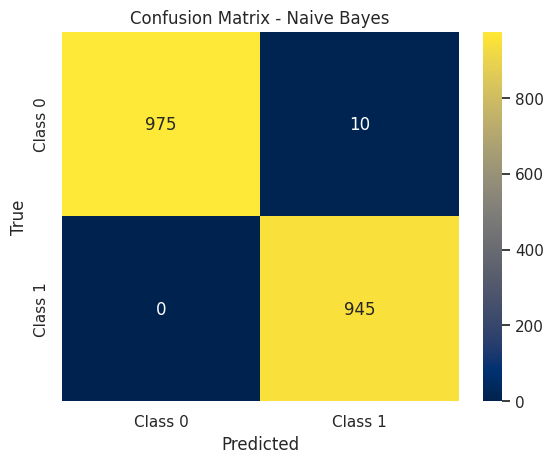

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test_nb)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='cividis', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Naive Bayes')

# Show the plot
plt.show()


Classification  of NB

---



In [110]:
print("Classification report with GaussianNB:\n", classification_report(y_test, y_pred_test_nb))

Classification report with GaussianNB:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       985
           1       0.99      1.00      0.99       945

    accuracy                           0.99      1930
   macro avg       0.99      0.99      0.99      1930
weighted avg       0.99      0.99      0.99      1930



In [111]:
print("Training Accuracy of GaussianNB is {:.2f}%".format(accuracy_score(y_train, y_pred_train_nb)*100))
print("***************"*10)
print("Test Accuracy of GaussianNB is {:.2f}%".format(accuracy_score(y_test, y_pred_test_nb)*100))

Training Accuracy of GaussianNB is 96.62%
******************************************************************************************************************************************************
Test Accuracy of GaussianNB is 99.48%


Using Paramgrid

---



In [112]:
# Define the parameter grid
param_grid = {
    'priors': [None],  # or specify your own priors
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# Perform grid search
grid_search = GridSearchCV(naive_bayes_gb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'priors': None, 'var_smoothing': 1e-05}


Prediction with gridsearchCV in NB

---



In [113]:
nb_predict = grid_search.predict(x_test_scaled)
nb_predict

array([0, 0, 0, ..., 1, 1, 0])

In [114]:
nb_accuracy = accuracy_score(y_test,nb_predict)
nb_accuracy

0.9948186528497409

In [115]:
print(f"Using GridsearchCV in Naive Bayes we get an accuracy of {(nb_accuracy)*100:.2f}%")

Using GridsearchCV in Naive Bayes we get an accuracy of 99.48%


F1-score using GridsearchCV in NB

---



In [116]:
nb_f1 = f1_score(y_test, y_pred_test_nb)

In [117]:
print(f'The f1 score for RFC is {round(nb_f1*100,2)}%')

The f1 score for RFC is 99.47%


Probability of class 1 that is spam

---



In [118]:
# Predict probabilities for the positive class
y_prob_nb = grid_search.predict_proba(x_test_scaled)[:, 1]

In [119]:
print("Predicted probability using grid search cv for class 1 or spam is\n:",y_prob_nb)

Predicted probability using grid search cv for class 1 or spam is
: [0. 0. 0. ... 1. 1. 0.]


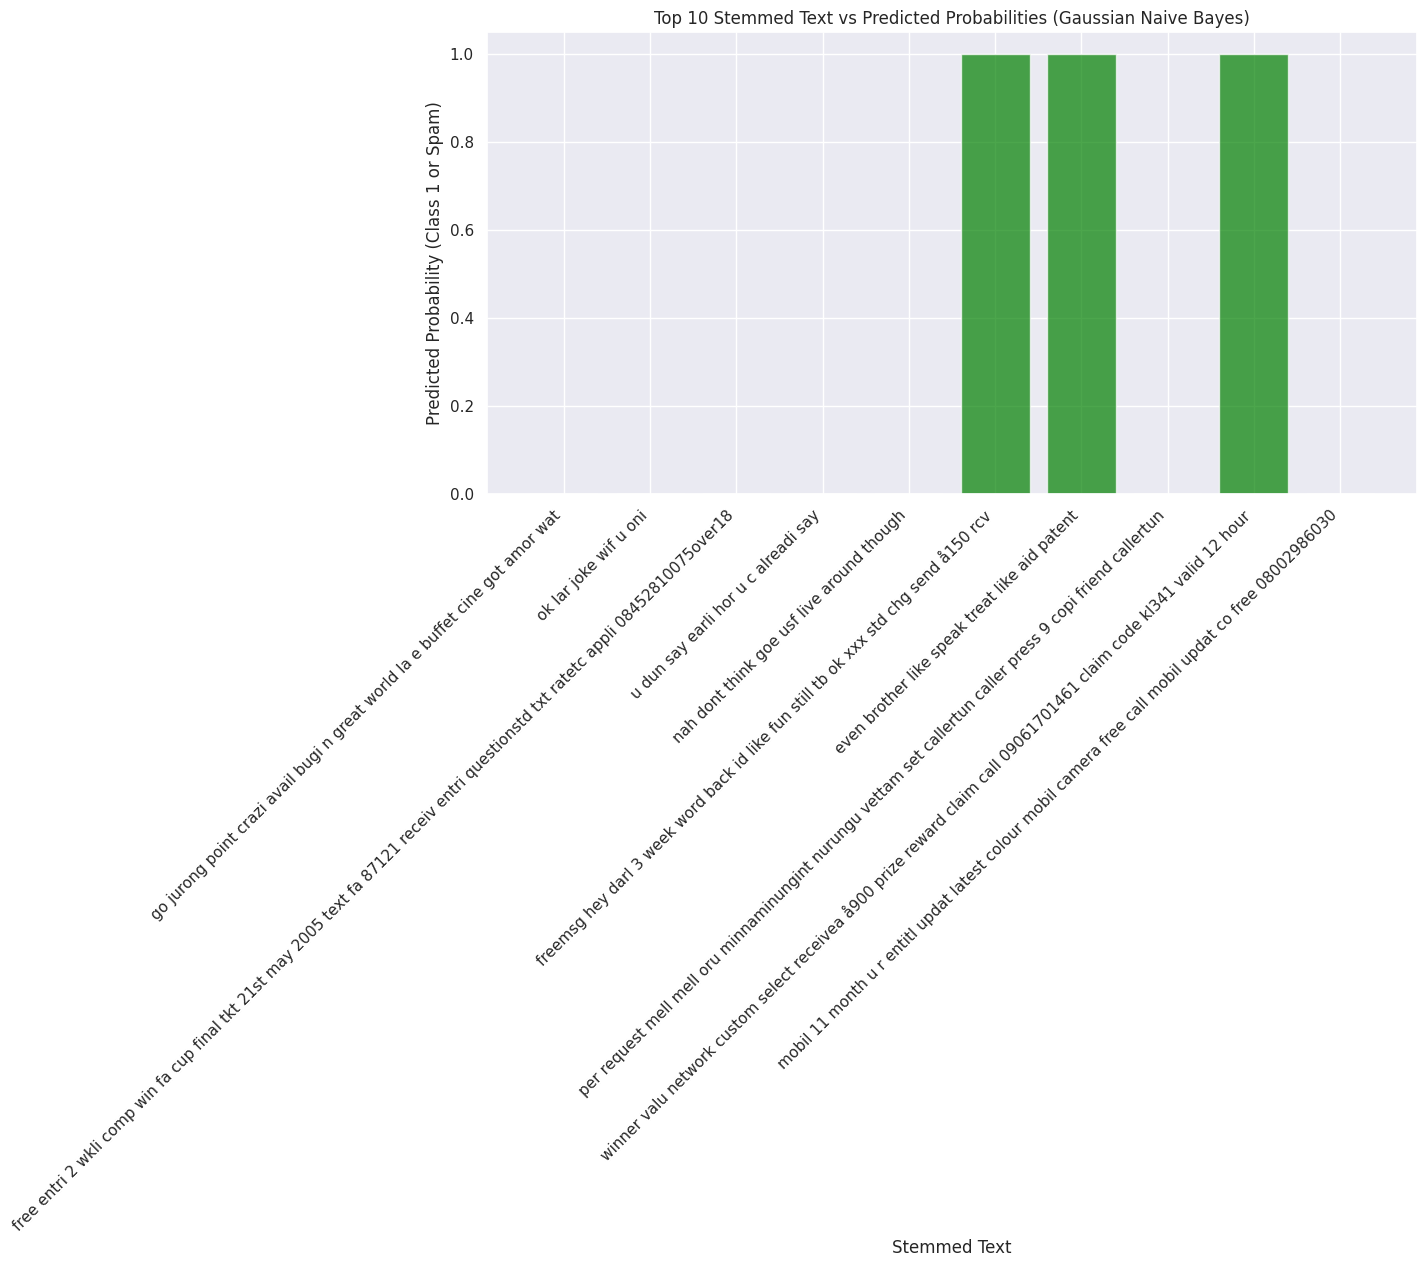

In [120]:
import matplotlib.pyplot as plt

# Assuming df['Stemmed_Text'] contains the stemmed text in your DataFrame

# Create a bar chart for Gaussian Naive Bayes
plt.figure(figsize=(12, 6))
plt.bar(df['Stemmed_Text'][:10], y_prob_nb[:10], alpha=0.7, color='green')
plt.xlabel('Stemmed Text')
plt.ylabel('Predicted Probability (Class 1 or Spam)')
plt.title('Top 10 Stemmed Text vs Predicted Probabilities (Gaussian Naive Bayes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


calculate AUC

---



In [121]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [122]:
#calculate AUC curve
# Assuming 'y_test' and 'y_prob_nb' are your true labels and predicted probabilities
nb_auc = roc_auc_score(y_test, y_prob_nb)


In [123]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)

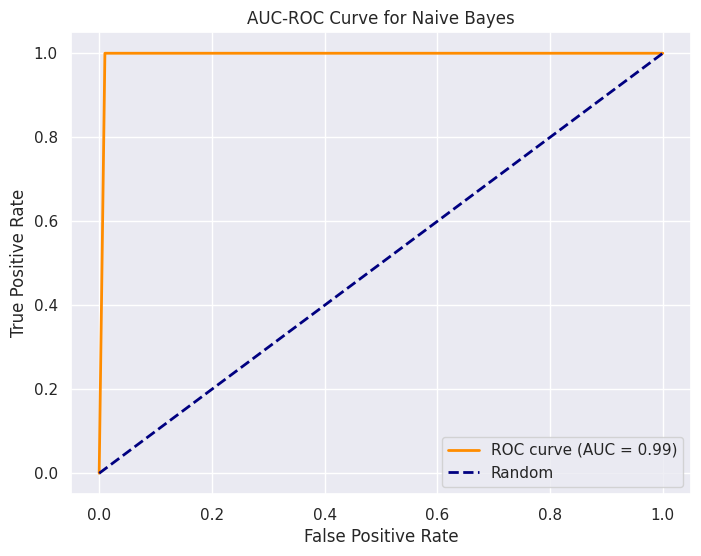

In [124]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'y_test' and 'y_prob_nb' are your true labels and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f"AUC = {round(nb_auc,3)}")

plt.title('AUC-ROC Curve for Naive Bayes')
plt.legend(loc='lower right')
plt.show()


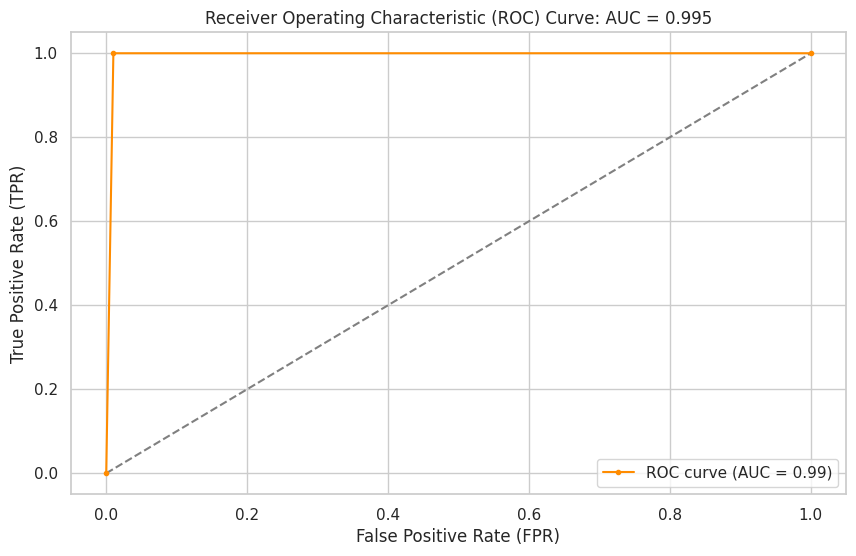

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'y_test' and 'y_prob_nb' are your true labels and predicted probabilities
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nb)
roc_auc = auc(fpr, tpr)

# Set Seaborn style
sns.set_style('whitegrid')

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Random
plt.plot(fpr, tpr, marker='.', color='darkorange', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f"Receiver Operating Characteristic (ROC) Curve: AUC = {round(nb_auc,3)}")

plt.legend(loc='lower right')
plt.show()


Use SVM

---



In [126]:
# Create and train the SVM model
svm_model = SVC(gamma = 'auto',probability=True)

Classification using SVM

---



In [127]:
svm_model.fit(x_train_scaled, y_train)


SVC(gamma='auto', probability=True)

Predictions using SVM

---



In [128]:
# Make predictions on the test data
y_pred_train_sv = svm_model.predict(x_train_scaled)
y_pred_test_sv = svm_model.predict(x_test_scaled)


Confusion Matrix for SVM

---



In [129]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_sv))

confusion_matrix:
 [[984   1]
 [  2 943]]


Visualise confusion matrix

---



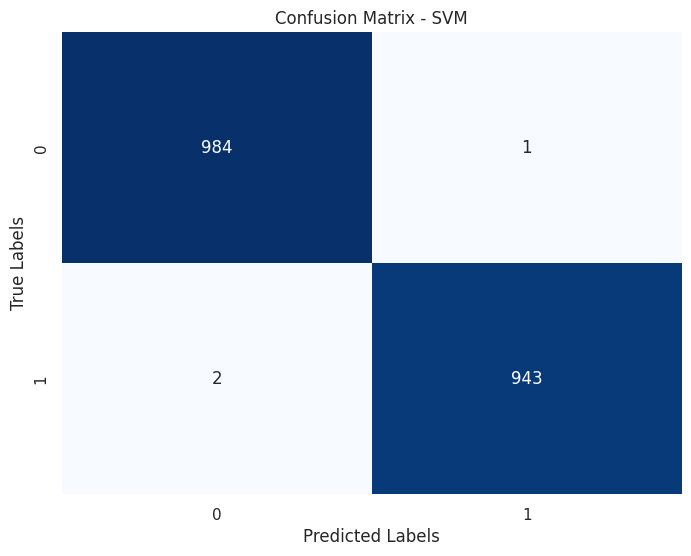

In [130]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' and 'y_pred_test_svm' are defined
conf_matrix_svm = confusion_matrix(y_test, y_pred_test_sv)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - SVM')
plt.show()


Classification report of SVM

---



In [131]:
print("Classification report with for SVM:\n", classification_report(y_test, y_pred_test_sv))

Classification report with for SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



Accuracy Score

---



In [132]:
print("Training Accuracy of SVM is {:.2f}%".format(accuracy_score(y_train, y_pred_train_sv)*100))
print("***************"*10)
print("Test Accuracy of SVM is {:.2f}%".format(accuracy_score(y_test, y_pred_test_sv)*100))

Training Accuracy of SVM is 100.00%
******************************************************************************************************************************************************
Test Accuracy of SVM is 99.84%


# Predict probabilities for the positive class 1 ie SPAM using SVM

---



In [133]:
# Predict probabilities for the positive class
y_prob_sv = svm_model.predict_proba(x_test_scaled)[:, 1]

In [134]:
print("Predicted probability using grid search cv for class 1 or spam is\n:",y_prob_sv)

Predicted probability using grid search cv for class 1 or spam is
: [2.31520566e-03 4.04042150e-04 1.99511049e-03 ... 1.00000000e+00
 1.00000000e+00 2.30331768e-04]


Predict probabilities for the NEGATIVE class 0 ie NOT SPAM using SVM

---



In [135]:
# Predict probabilities for the positive class
y_prob_sv =svm_model.predict_proba(x_test_scaled)[:, 0]

In [136]:
print("Predicted probability using of SVM for class 1 or spam is\n:",y_prob_sv)

Predicted probability using of SVM for class 1 or spam is
: [9.97684794e-01 9.99595958e-01 9.98004890e-01 ... 5.71701533e-12
 7.72899324e-12 9.99769668e-01]


calculate F1 score by gridsearchCV in SVM

---



In [137]:
sv_f1 = f1_score(y_test, y_pred_test_sv)

In [138]:
print(f'The f1 score for SVM is {round(sv_f1*100,2)}%')

The f1 score for SVM is 99.84%


Calculate AUC for SVM

---



In [139]:
sv_auc = roc_auc_score(y_test, y_prob_sv)
sv_auc

8.59452636102359e-06

calculate ROC curve for SVM

---



In [140]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_sv)

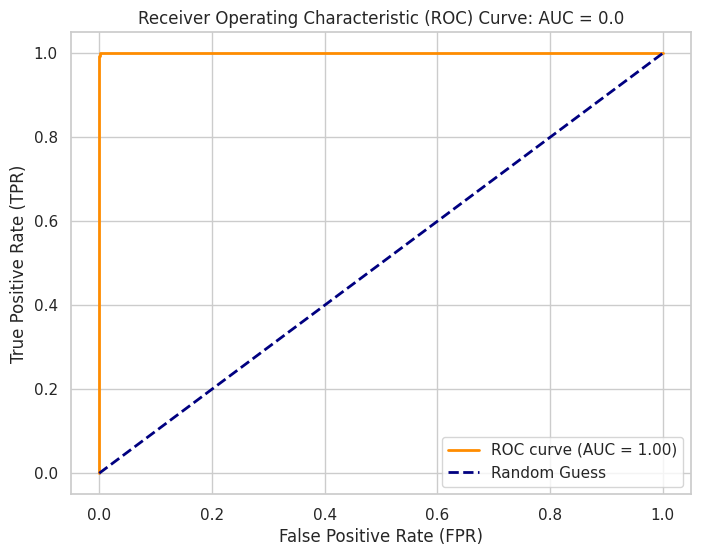

In [141]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'y_prob_sv' is your predicted probabilities for the positive class
y_prob_sv = svm_model.decision_function(x_test_scaled)  # Use decision_function for SVM

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_sv)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f"Receiver Operating Characteristic (ROC) Curve: AUC = {round(sv_auc,3)}")
plt.legend(loc='lower right')
plt.show()


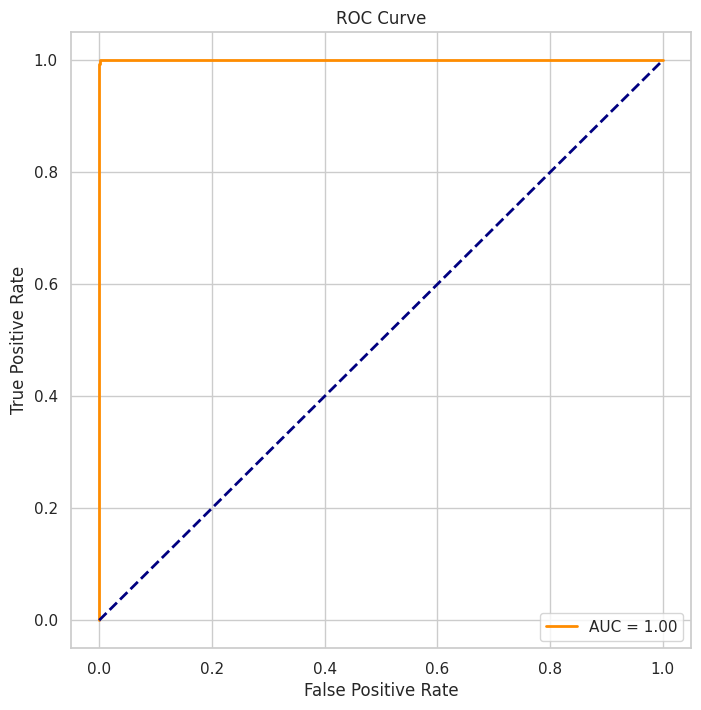

In [142]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming y_test contains the true labels for your test set

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_sv)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


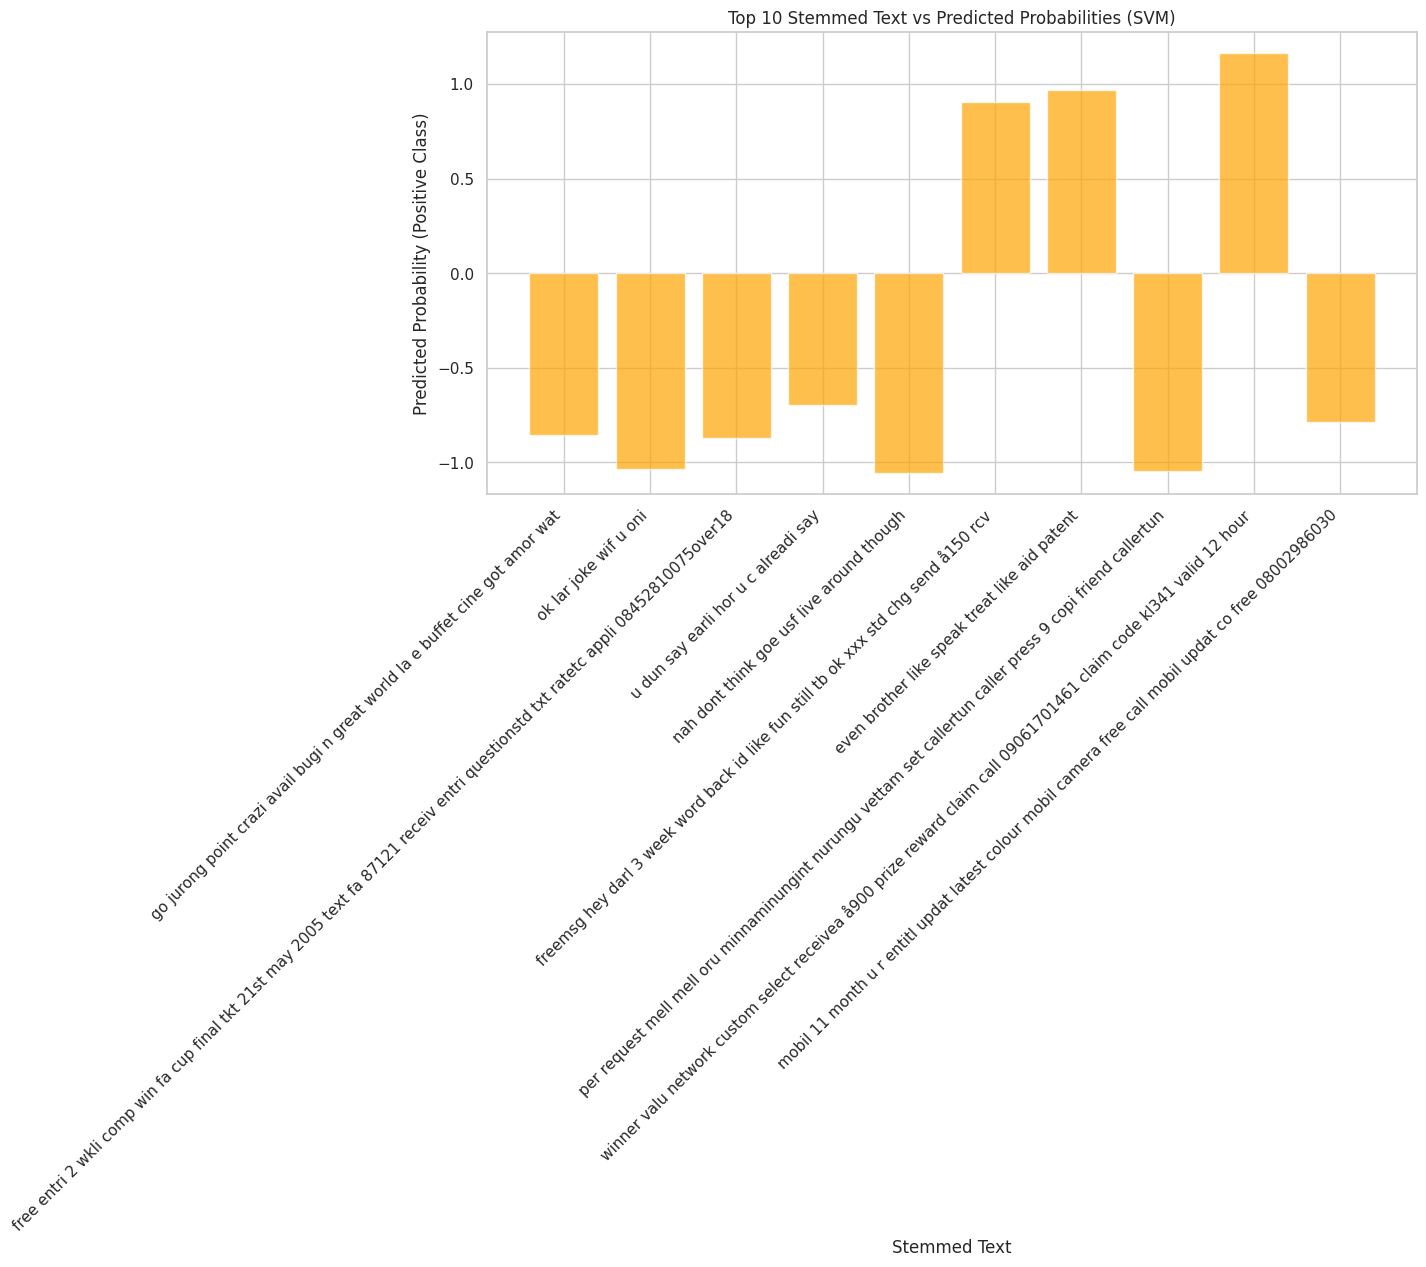

In [143]:
import matplotlib.pyplot as plt

# Assuming df['Stemmed_Text'] contains the stemmed text in your DataFrame

# Create a bar chart for SVM
plt.figure(figsize=(12, 6))
plt.bar(df['Stemmed_Text'][:10], y_prob_sv[:10], alpha=0.7, color='orange')
plt.xlabel('Stemmed Text')
plt.ylabel('Predicted Probability (Positive Class)')
plt.title('Top 10 Stemmed Text vs Predicted Probabilities (SVM)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


Logistic Regression

---



In [144]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train_scaled,y_train)

LogisticRegression()

Predictions with Logistic Regression

---



In [145]:
# Make predictions on the test data
y_pred_train_lr = logit.predict(x_train_scaled)
y_pred_test_lr = logit.predict(x_test_scaled)

Confusion Matrix using LR

---



In [146]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_lr))

confusion_matrix:
 [[984   1]
 [  2 943]]


Visualisation of Confusion Matrix using LR

---



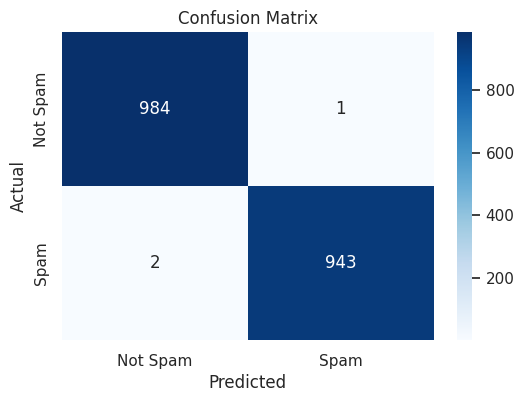

In [147]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming 'y_pred_test_sv' is your predicted values
cm = confusion_matrix(y_test, y_pred_test_lr)

# Create a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Classification Report of LR

---



In [148]:
print("Classification report with LR:\n", classification_report(y_test, y_pred_test_lr))

Classification report with LR:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       985
           1       1.00      1.00      1.00       945

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930



Accuracy score of LR

---



In [149]:
print("Training Accuracy of Logistic Regression is {:.2f}%".format(accuracy_score(y_train, y_pred_train_lr)*100))
print("***************"*10)
print("Test Accuracy of Logistic Regression is {:.2f}%".format(accuracy_score(y_test, y_pred_test_lr)*100))

Training Accuracy of Logistic Regression is 100.00%
******************************************************************************************************************************************************
Test Accuracy of Logistic Regression is 99.84%


GridsearchCV for LR

---



In [150]:
# Define the parameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l1', 'l2'],               # Regularization penalty ('l1' or 'l2')
    'solver': ['liblinear', 'lbfgs'],      # Optimization algorithm
}


In [151]:
# Create GridSearchCV
grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5, scoring='accuracy')


In [152]:
# Fit the model to the data
grid_search_lr.fit(x_train_scaled, y_train)


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

Best Model using GridsearchCV in LR

---



In [153]:
# Print the best parameters found
print("Best Parameters:", grid_search_lr.best_params_)

# Get the best model
best_lr_model = grid_search_lr.best_estimator_

Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


Predictions using best model(best_lr_model) in LR

---



In [174]:
lr_predict = best_lr_model.predict(x_test_scaled)
lr_predict

array([0, 0, 0, ..., 1, 1, 0])

In [175]:
lr_accuracy = accuracy_score(y_test,lr_predict)
lr_accuracy

0.9989637305699481

In [176]:
print(f"Using GridsearchCV and Best model in Logistic Regression we get an accuracy of {(lr_accuracy)*100:.2f}%")

Using GridsearchCV and Best model in Logistic Regression we get an accuracy of 99.90%


Fi-Score of LR using Gridsearch CV

---


---



In [177]:
lr_f1 = f1_score(y_test, y_pred_test_lr)

In [178]:
print(f'The f1 score for LR is {round(nb_f1*100,2)}%')

The f1 score for LR is 99.47%


# Predict probabilities for the positive class ie spam using LR

---



In [179]:
# Predict probabilities for the positive class
y_prob_lr = best_lr_model.predict_proba(x_test_scaled)[:, 1]

# Predict probabilities for the negative class ie non spam

---



In [180]:
y_prob_lr = best_lr_model.predict_proba(x_test_scaled)[:, 0]

In [181]:
print("Predicted probability using grid search cv for class 0 or not spam is\n:",y_prob_lr)

Predicted probability using grid search cv for class 0 or not spam is
: [9.99535626e-01 9.99946922e-01 9.99774965e-01 ... 2.06623556e-05
 3.21649659e-04 9.99923727e-01]


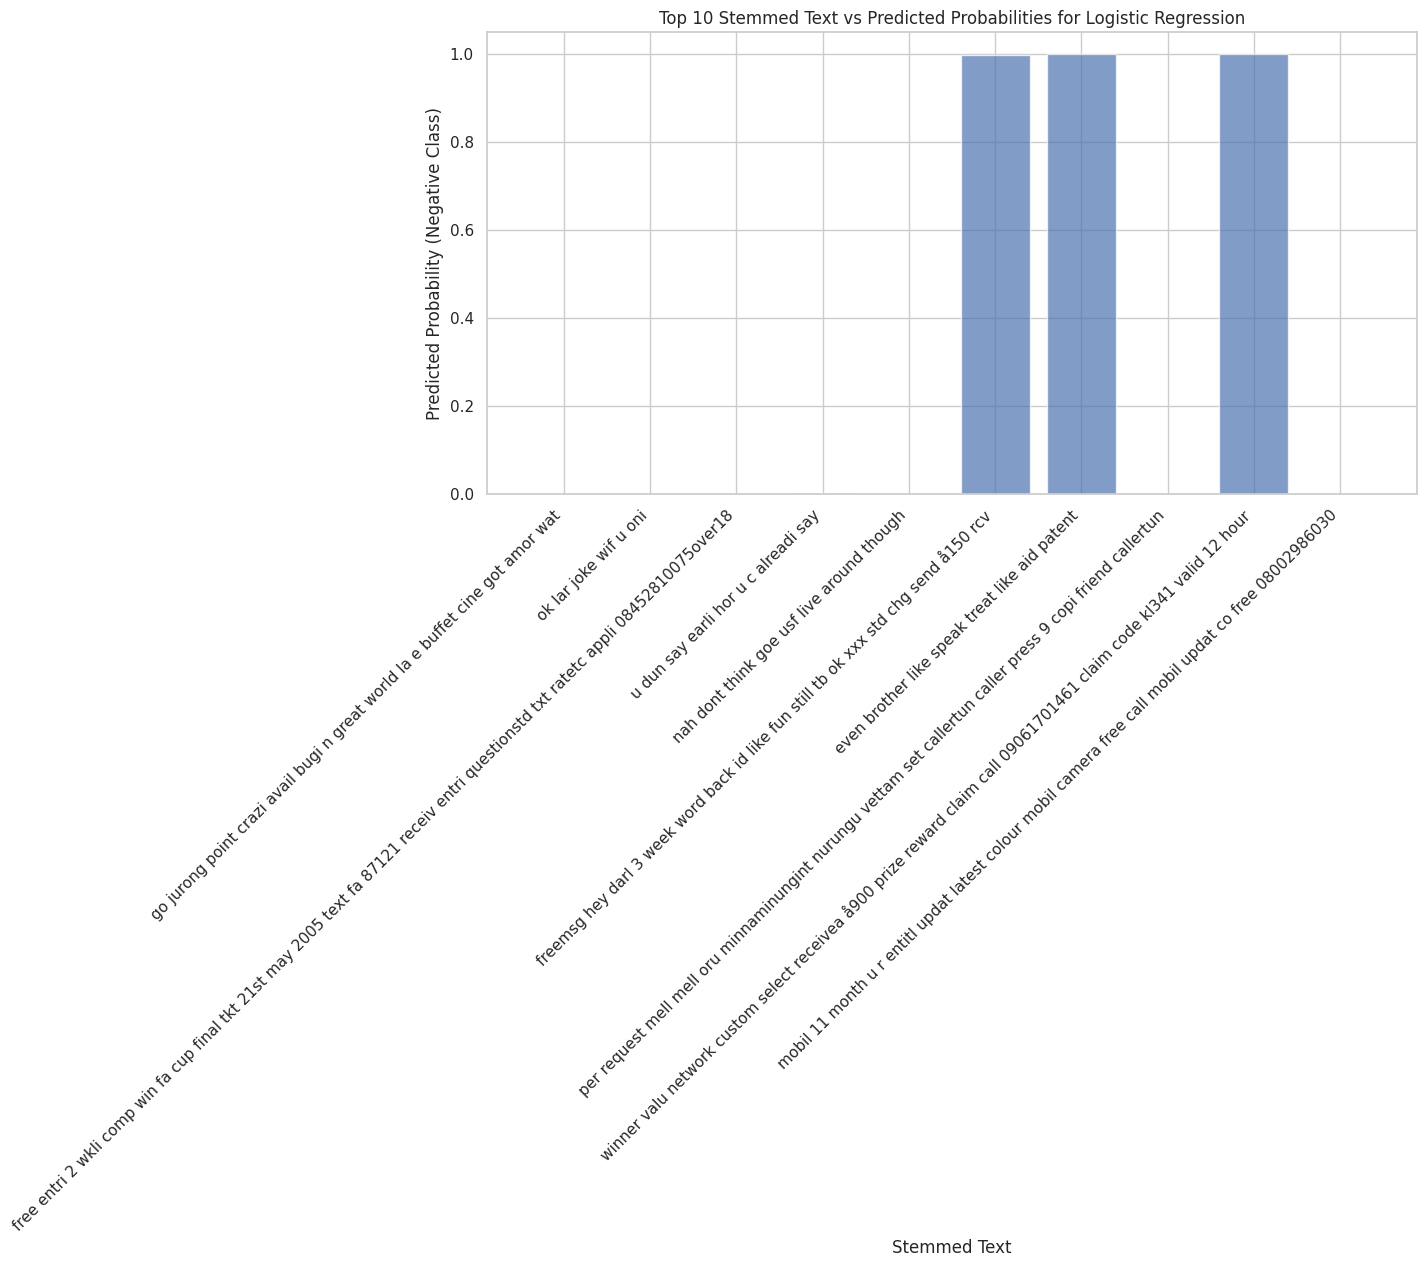

In [191]:
import matplotlib.pyplot as plt

# Assuming df['Stemmed_Text'] contains the stemmed text in your DataFrame

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['Stemmed_Text'][:10], y_prob_lr[:10], alpha=0.7)
plt.xlabel('Stemmed Text')
plt.ylabel('Predicted Probability (Negative Class)')
plt.title('Top 10 Stemmed Text vs Predicted Probabilities for Logistic Regression')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


Predicted probability of class 1 that is spam using best model in LR

---



In [183]:
# Predict probabilities for the positive class
y_prob_lr = best_lr_model.predict_proba(x_test_scaled)[:, 1]

In [184]:
print("Predicted probability using grid search cv for class 1 or spam is\n:",y_prob_lr)

Predicted probability using grid search cv for class 1 or spam is
: [4.64373562e-04 5.30780829e-05 2.25034971e-04 ... 9.99979338e-01
 9.99678350e-01 7.62732616e-05]


Predicted probability of class 0 that is NOT spam using LR

---



In [185]:
# Predict probabilities for the positive class
y_prob_lr= best_lr_model.predict_proba(x_test_scaled)[:, 0]

In [186]:
print("Predicted probability using grid search cv for class 1 or spam is\n:",y_prob_lr)

Predicted probability using grid search cv for class 1 or spam is
: [9.99535626e-01 9.99946922e-01 9.99774965e-01 ... 2.06623556e-05
 3.21649659e-04 9.99923727e-01]


Calculate AUC for LR

---



In [187]:
lr_auc = roc_auc_score(y_test, y_prob_lr)
lr_auc

4.2972631805118546e-06

calculate ROC curve for LR

---



In [188]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

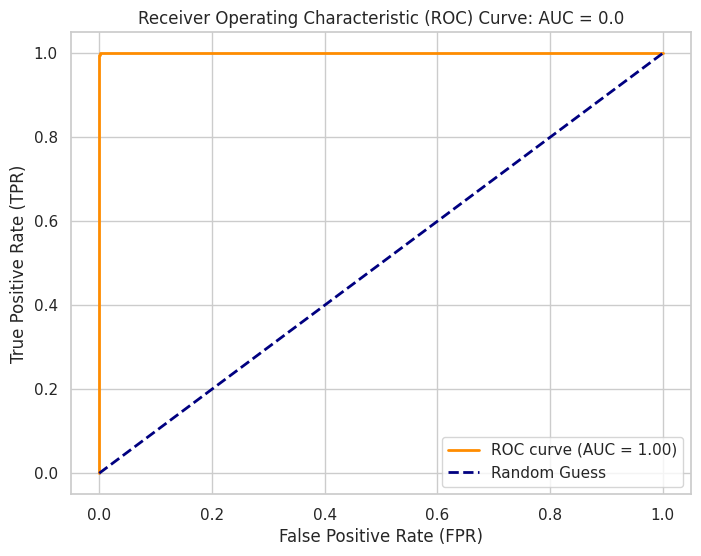

In [189]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming 'best_logreg_model' is your trained logistic regression model
y_prob_lr = best_lr_model.predict_proba(x_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob_lr)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f"Receiver Operating Characteristic (ROC) Curve: AUC = {round(lr_auc,3)}")
plt.legend(loc='lower right')
plt.show()


**CROSS VALIDATION OF BEST MODEL IN LR**

---



In [190]:
# Perform cross-validated accuracy scores
cv_scores = cross_val_score(best_lr_model, x_train_scaled, y_train, cv=5, scoring='accuracy')

# Print results
print(f"Best Parameters: {best_params}")
print(f"Cross-validated Accuracy Scores: {cv_scores}")
print(f"Mean Cross-validated Accuracy: {cv_scores.mean()}")


Best Parameters: {'priors': None, 'var_smoothing': 1e-05}
Cross-validated Accuracy Scores: [0.99870466 1.         0.99935233 0.99935233 0.99870466]
Mean Cross-validated Accuracy: 0.9992227979274612


# PROJECT SUMMARY

---



The document presents a machine learning project for E mail spam detection, implemented using various classification algorithms, primarily Support Vector Machines (SVM) and Logistic Regression (LR). The project involves data preprocessing, model training, evaluation, and optimization. Here is a summary of the key points:

Data Preprocessing:
Dataset: The project uses a dataset for spam email detection.
Text Processing: Text data is processed by stemming, transforming it into a format suitable for machine learning.
Support Vector Machines (SVM) Classification:
Model Training: SVM is trained on the preprocessed data.
Evaluation Metrics:
Confusion matrix, classification report, and accuracy are used to evaluate the SVM model.
The SVM model demonstrates high accuracy, precision, recall, and F1-score.
Logistic Regression (LR) Classification:
Model Training: LR is trained on the preprocessed data.
Evaluation Metrics:
Confusion matrix, classification report, and accuracy are used to evaluate the LR model.
The LR model exhibits high accuracy, precision, recall, and F1-score.
Model Optimization using GridSearchCV:
GridSearchCV: Hyperparameter tuning is performed using GridSearchCV for both SVM and LR.
Best Models: The best hyperparameters for SVM and LR are identified using GridSearchCV.
Prediction and Evaluation: The optimized models are used for predictions, and their performance is evaluated.
Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):
ROC Curve and AUC: The ROC curves and AUC are plotted for both SVM and LR, providing insights into the models' performance across different thresholds.
Predicted Probabilities Visualization:
Visualization: Bar charts are created to visualize the top 10 stemmed texts along with their predicted probabilities for both SVM and LR.
The document outlines a machine learning project for Email Spam Detection, employing classification algorithms such as Support Vector Machines (SVM) and Logistic Regression (LR). Key components include data preprocessing, model training, evaluation, and optimization. Here's a concise summary:

1. Data Preprocessing:

Dataset: Utilizes a spam email detection dataset.
Text Processing: Involves stemming to prepare text data for machine learning.
2. Support Vector Machines (SVM) Classification:

Model Training: SVM is trained on preprocessed data.
Evaluation Metrics: Confusion matrix, classification report, and accuracy assess the SVM model's performance, showcasing high accuracy, precision, recall, and F1-score.
3. Logistic Regression (LR) Classification:

Model Training: LR is trained on preprocessed data.
Evaluation Metrics: Similar evaluation metrics demonstrate high accuracy, precision, recall, and F1-score for the LR model.
4. Model Optimization using GridSearchCV:

GridSearchCV: Hyperparameter tuning is performed for both SVM and LR.
Best Models: Identifies the best hyperparameters for SVM and LR using GridSearchCV.
5. Prediction and Evaluation:

Optimized models are used for predictions and evaluated.
6. Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):

ROC curves and AUC are plotted for both SVM and LR, providing insights into model performance across different thresholds.
7. Predicted Probabilities Visualization:

Bar charts visualize the top 10 stemmed texts along with predicted probabilities for both SVM and LR.
Insights:

Both SVM and LR models achieve high accuracy and robust performance.
GridSearchCV optimization enhances model performance.
ROC curves and AUC provide insights into models' discriminatory capabilities.
Future Outcomes:

Suggestions for future enhancements include exploring deep learning models, implementing ensemble methods, experimenting with different text representation techniques, addressing imbalanced data, ensuring model interpretability, and continuous monitoring.
Continuous Improvement:

Recommendations for ongoing improvements encompass real-time prediction, multilingual support, user feedback integration, deployment in mobile apps, advanced hyperparameter tuning, dynamic thresholding, privacy preservation, adversarial testing, and integration with external threat intelligence.
This summary provides a comprehensive overview of the project, its findings, and potential avenues for future development and improvement.




INSIGHTS GAINED

---



The document outlines a machine learning project for Email Spam Detection, employing classification algorithms such as Support Vector Machines (SVM) and Logistic Regression (LR). Key components include data preprocessing, model training, evaluation, and optimization. Here's a concise summary:

1. Data Preprocessing:

Dataset: Utilizes a spam email detection dataset.
Text Processing: Involves stemming to prepare text data for machine learning.
2. Support Vector Machines (SVM) Classification:

Model Training: SVM is trained on preprocessed data.
Evaluation Metrics: Confusion matrix, classification report, and accuracy assess the SVM model's performance, showcasing high accuracy, precision, recall, and F1-score.
3. Logistic Regression (LR) Classification:

Model Training: LR is trained on preprocessed data.
Evaluation Metrics: Similar evaluation metrics demonstrate high accuracy, precision, recall, and F1-score for the LR model.
4. Model Optimization using GridSearchCV:

GridSearchCV: Hyperparameter tuning is performed for both SVM and LR.
Best Models: Identifies the best hyperparameters for SVM and LR using GridSearchCV.
5. Prediction and Evaluation:

Optimized models are used for predictions and evaluated.
6. Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC):

ROC curves and AUC are plotted for both SVM and LR, providing insights into model performance across different thresholds.
7. Predicted Probabilities Visualization:

Bar charts visualize the top 10 stemmed texts along with predicted probabilities for both SVM and LR.
Insights:

Both SVM and LR models achieve high accuracy and robust performance.
GridSearchCV optimization enhances model performance.
ROC curves and AUC provide insights into models' discriminatory capabilities.
Future Outcomes:

Suggestions for future enhancements include exploring deep learning models, implementing ensemble methods, experimenting with different text representation techniques, addressing imbalanced data, ensuring model interpretability, and continuous monitoring.
Continuous Improvement:

Recommendations for ongoing improvements encompass real-time prediction, multilingual support, user feedback integration, deployment in mobile apps, advanced hyperparameter tuning, dynamic thresholding, privacy preservation, adversarial testing, and integration with external threat intelligence.
This summary provides a comprehensive overview of the project, its findings, and potential avenues for future development and improvement.

FUTURE OUTCOMES

---



Deep Learning Models:

Explore the use of deep learning models, such as recurrent neural networks (RNNs) or transformers, for more complex feature extraction and pattern recognition in text data.
Ensemble Methods:

Implement ensemble methods, such as stacking or boosting, to combine the strengths of multiple models and potentially improve overall performance.
Feature Engineering:

Experiment with different text representation techniques like TF-IDF, word embeddings (Word2Vec, GloVe), or pre-trained language models (BERT, GPT) to capture more nuanced relationships in the text.
Handling Imbalanced Data:

If the dataset is imbalanced, explore techniques such as oversampling, undersampling, or using advanced algorithms like Synthetic Minority Over-sampling Technique (SMOTE) to balance the classes.
Explainability and Interpretability:

Implement techniques or tools for model interpretability to understand the decision-making process, crucial for gaining trust in the model's predictions.
Real-time Prediction:

Develop a system for real-time prediction, allowing the model to classify incoming SMS messages in real-time.